# Statistical Fundations of Machine Learning

Author: Fernando Loro Velardo

Master program: Master Of Science Applied Sciences And Engineering: Applied Computer Science


## Classification Project:

In this notebook we are going to develop the classification project for the subject Statistical Fundations of Machine Learning. We are going to use two datasets:

    - A synthetic dataset generated using the sklearn.dataset library. This library allows us to create datasets with a custom number of classes, distribution, noise, unbalance...
    - A real world dataset, a Pokemon Dataset with the information of each pokemon. We will try to classify the pokemon Type based on his properties such as Attack Points, Color...

For these two classification problems we are going to use two machine learning alogrithms based on classification:
    - Random Forests
    - K-nearest neighbors
    
For each problem, we will train a set of different models tunning the algorithm hyperparameters and selecting a different number of features.

## 1. Synthetic Dataset

In order to investigate and obtain some conclussions we are going to generate two synthetic datasets. First, a dataset without noise and a clear separation of classes. Secondly, we will create a dataset with irrelevant variables, noise, and multiple clusters per class.

### 1.1 Imports and Generating the Dataset:

We first import the required libraries. We are going to use Scikit-learn for the machine learning part, Matplotlib and Seaborn for the representations, Pandas for the data analysis and manipulation and  NumPy for operating with vectors.

In [32]:
# Import the required libraries

import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, train_test_split, cross_val_predict
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from itertools import combinations

from math import ceil

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Show plots in the notebooks
%matplotlib inline

Now we will create the first synthetic dataset. This first dataset will consists of:

    - 2 Classes
    - 4 Features (All of them are informative)
    - 100 Samples
    - 0 % Of randomly assigned class
    - With a high class separation
    - 1 Cluster per class
    - Perfectly Balanced
    
 As we will observe later, this parameters will create a dataset easy to classify

In [33]:
# Generating the dataset

data = make_classification(n_samples=100, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=2.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)


synth_dataset_1 = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,5)])
synth_dataset_1['y'] = data[1]

In [34]:
synth_dataset_1[:5]

,x1,x2,x3,x4,y
0,-2.802299,-3.397404,2.618439,-3.147661,0
1,1.681384,-2.217879,-2.703512,-3.181351,1
2,-2.268622,-2.416531,1.567640,-1.985413,0
3,3.129665,-2.441012,-2.159532,-1.268635,1
4,-2.311822,-2.072374,1.048028,-1.965693,0


Now we will create the second synthetic dataset. This dataset will consists of:

    - 2 Classes
    - 4 Features (3 of them are informative and 1 of them is irrelevant)
    - 100 Samples
    - 20 % Of randomly assigned class
    - With a low class separation
    - 2 Cluster per class
    - Class unbalance of around 30/70
    

As we will observe later, this parameters will create a dataset hard to classify

In [35]:
# Generating the dataset

data = make_classification(n_samples=100, n_features=4, n_informative=3, n_redundant=1, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=2, weights=[0.3], flip_y=0.2, class_sep=0.7, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)


synth_dataset_2 = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,5)])
synth_dataset_2['y'] = data[1]

In [36]:
synth_dataset_2[:5]

,x1,x2,x3,x4,y
0,-1.873626,0.472901,1.395096,0.481379,1
1,0.095729,-0.034201,-0.176077,-0.572523,0
2,-1.455696,-0.866050,0.455518,2.475654,1
3,0.856346,1.539639,0.378092,-2.524375,1
4,1.250465,-0.252736,-0.788546,0.198004,1


### 1.2 Data Analysis:

Now we will obtain the basic information of the dataset:

First we are going to check the size of the dataset and the statistical information

In [37]:
# Basic information of each Dataset

print("Size of the Dataset 1:")
print(synth_dataset_1.shape)

print("Size of the Dataset 2:")
print(synth_dataset_2.shape)

Size of the Dataset 1:
(100, 5)
Size of the Dataset 2:
(100, 5)


In [38]:
print("\n" + "Statistical information of Dataset 1:")
synth_dataset_1.describe()


Statistical information of Dataset 1:


,x1,x2,x3,x4,y
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.036134,-2.001677,-0.237096,-1.880356,0.500000
std,2.346608,1.123398,2.267116,1.158634,0.502519
min,-3.845626,-5.166297,-6.203722,-5.073296,0.000000
25%,-2.080835,-2.698738,-2.119079,-2.612755,0.000000
50%,-0.411758,-2.075046,0.073606,-1.876297,0.500000
75%,2.266088,-1.493860,1.612429,-1.128026,1.000000
max,4.742344,1.727742,3.161916,0.504209,1.000000


In [39]:
print("\n" + "Statistical information of Dataset 2:")
synth_dataset_2.describe()


Statistical information of Dataset 2:


,x1,x2,x3,x4,y
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.316018,-0.012127,-0.248316,-0.465489,0.660000
std,1.174767,1.153368,1.154981,1.225124,0.476095
min,-3.683188,-3.055920,-2.525178,-3.274946,0.000000
25%,-0.106457,-0.842214,-1.200611,-1.310910,0.000000
50%,0.456484,-0.037925,-0.326399,-0.377800,1.000000
75%,1.077796,0.856121,0.630848,0.372774,1.000000
max,2.751895,2.857219,3.674650,2.997714,1.000000


Now we will display the class balance of the dataset number 1

In [40]:
print("0 class ratio: %0.2f %% " % (100 * synth_dataset_1.groupby('y').size()[0]/synth_dataset_1.shape[0]))
print("1 class ratio: %0.2f %% " % (100 * synth_dataset_1.groupby('y').size()[1]/synth_dataset_1.shape[0]))

0 class ratio: 50.00 % 
1 class ratio: 50.00 % 


And the class balance of the dataset number 2

In [41]:
print("0 class ratio: %0.2f %% " % (100 * synth_dataset_2.groupby('y').size()[0]/synth_dataset_2.shape[0]))
print("1 class ratio: %0.2f %% " % (100 * synth_dataset_2.groupby('y').size()[1]/synth_dataset_2.shape[0]))

0 class ratio: 34.00 % 
1 class ratio: 66.00 % 


### 1.3 Preprocessing:

There is no need to preprocess the information of the two synthetics datasets because all sample values are already numerical, the datasets are balanced enough and the sample values are in the same scale range so it is not strictly necesary to normalize the data.

### 1.4 Data Visualization:

In this part, we will obtain some basic represetations of the data in order to obtain some understanding of the information distribution. We will display the next graphs:
    
    - Paired scatter plots
    - Pair plots distributions
    - Box plots
    - Dimensionally reduction plots

#### 1.4.1 Paired Scatter Plot:

This representation displays the values of two features as a point per each dataset row in a 2D graph.

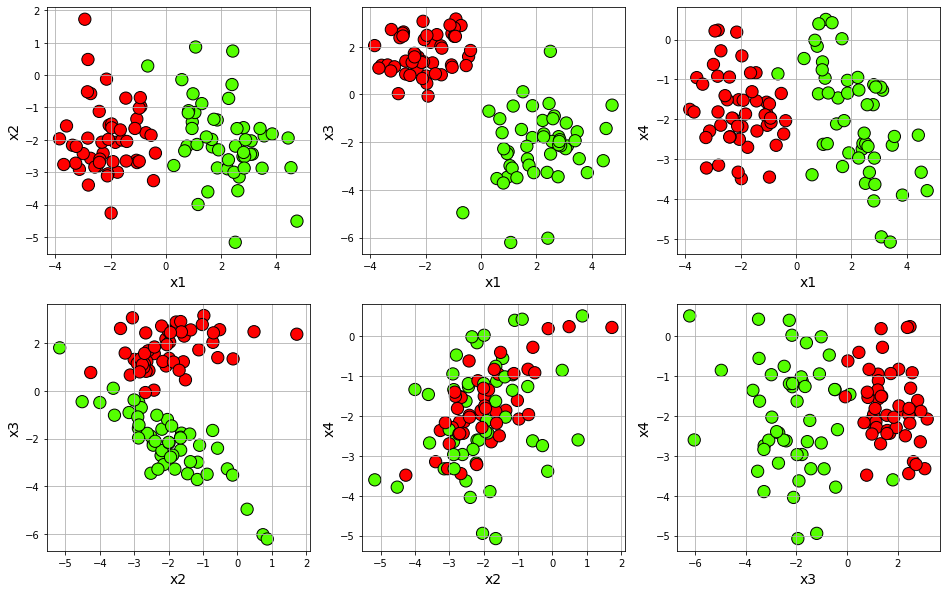

In [42]:
lst_var=list(combinations(synth_dataset_1.columns[:-1],2))
plt.figure(figsize=(16,10))

for i in range(1,len(lst_var)+1):
    plt.subplot(2,ceil(len(lst_var)/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(synth_dataset_1[var1],synth_dataset_1[var2],s=150,c=synth_dataset_1['y'], edgecolor='k', 
                cmap=plt.cm.get_cmap('prism', 2))
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

As we can observe, using features combination like x1 with x2 or x1 with x3 we can discriminate the two classes. This plots show that using these features, we will be able to do the classification with a good performance.

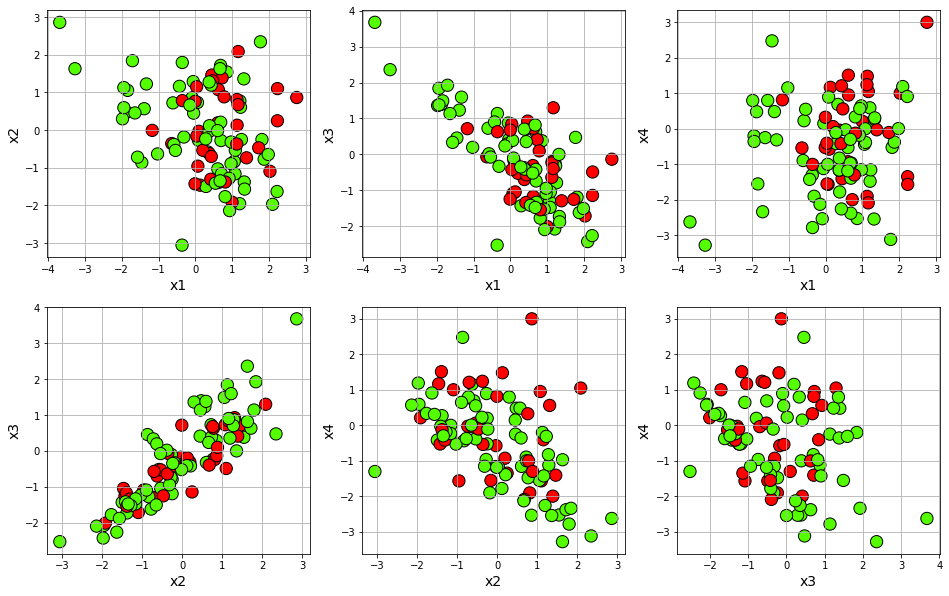

In [43]:
lst_var=list(combinations(synth_dataset_2.columns[:-1],2))
plt.figure(figsize=(16,10))

for i in range(1,len(lst_var)+1):
    plt.subplot(2,ceil(len(lst_var)/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(synth_dataset_2[var1],synth_dataset_2[var2],s=150,c=synth_dataset_2['y'], edgecolor='k', 
                cmap=plt.cm.get_cmap('prism', 2))
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

However, as we can see for the second dataset, the distribution of the values is much more diffuse, making the classification task harder.

#### 1.4.2 Pair plots distributions:

The pair plots distributions show the paired scatter plots and the histogram of each feature divided by classes. This representations allow us to obtain a quick impression of how well defined are classes and the overlapping between them (based on the histograms). For a higher overlapping of classes (overlapping of histagrams), the classification task will be harder.

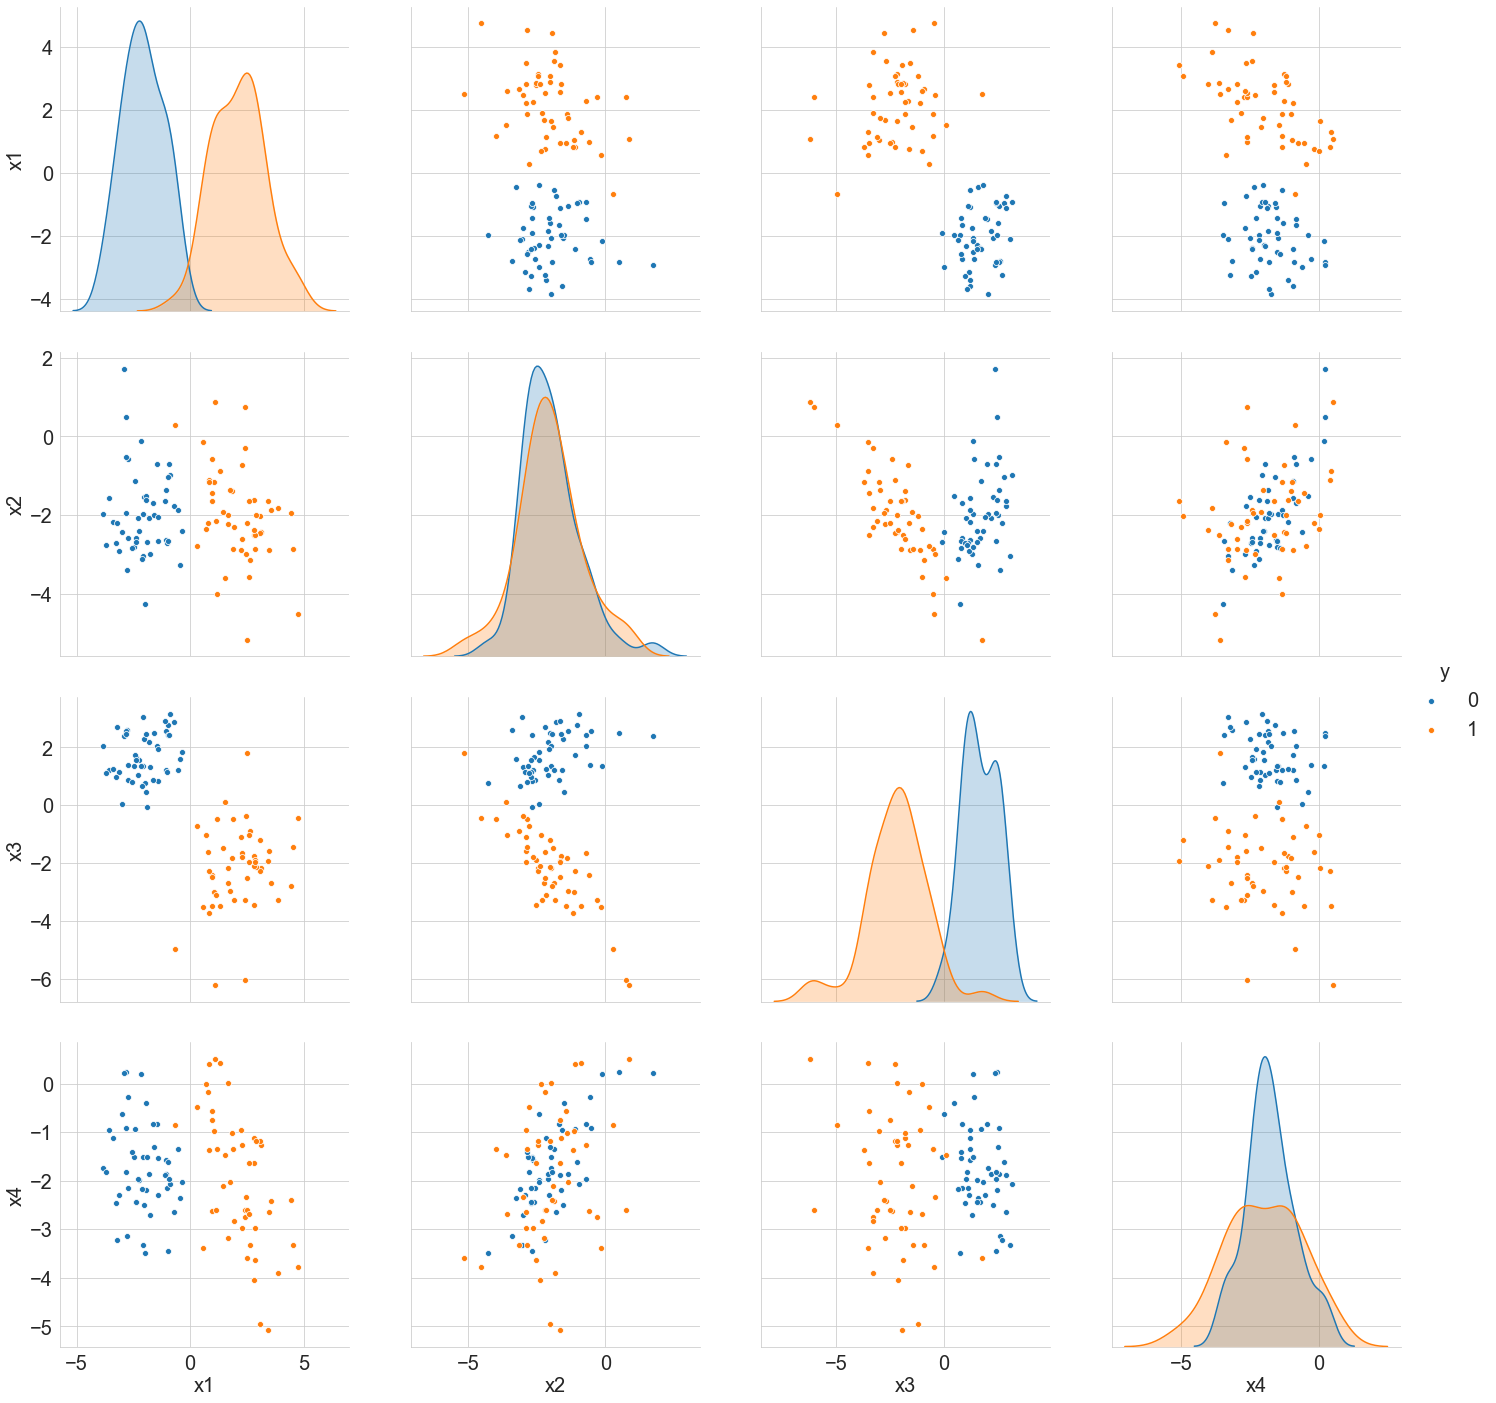

In [44]:
sns.set_style("whitegrid");
plt.rcParams.update({'font.size': 20})
sns.pairplot(synth_dataset_1, hue="y", vars=list(synth_dataset_1.columns.values)[:-1], height=5);
plt.show()

As we can see, the most useful variable is the one whose histograms has the lower overlapping betwwen classes, like x1 or x2, we can also see that the combinations between variables whose histograms show overlapping makes much harder to cluster the two classes.

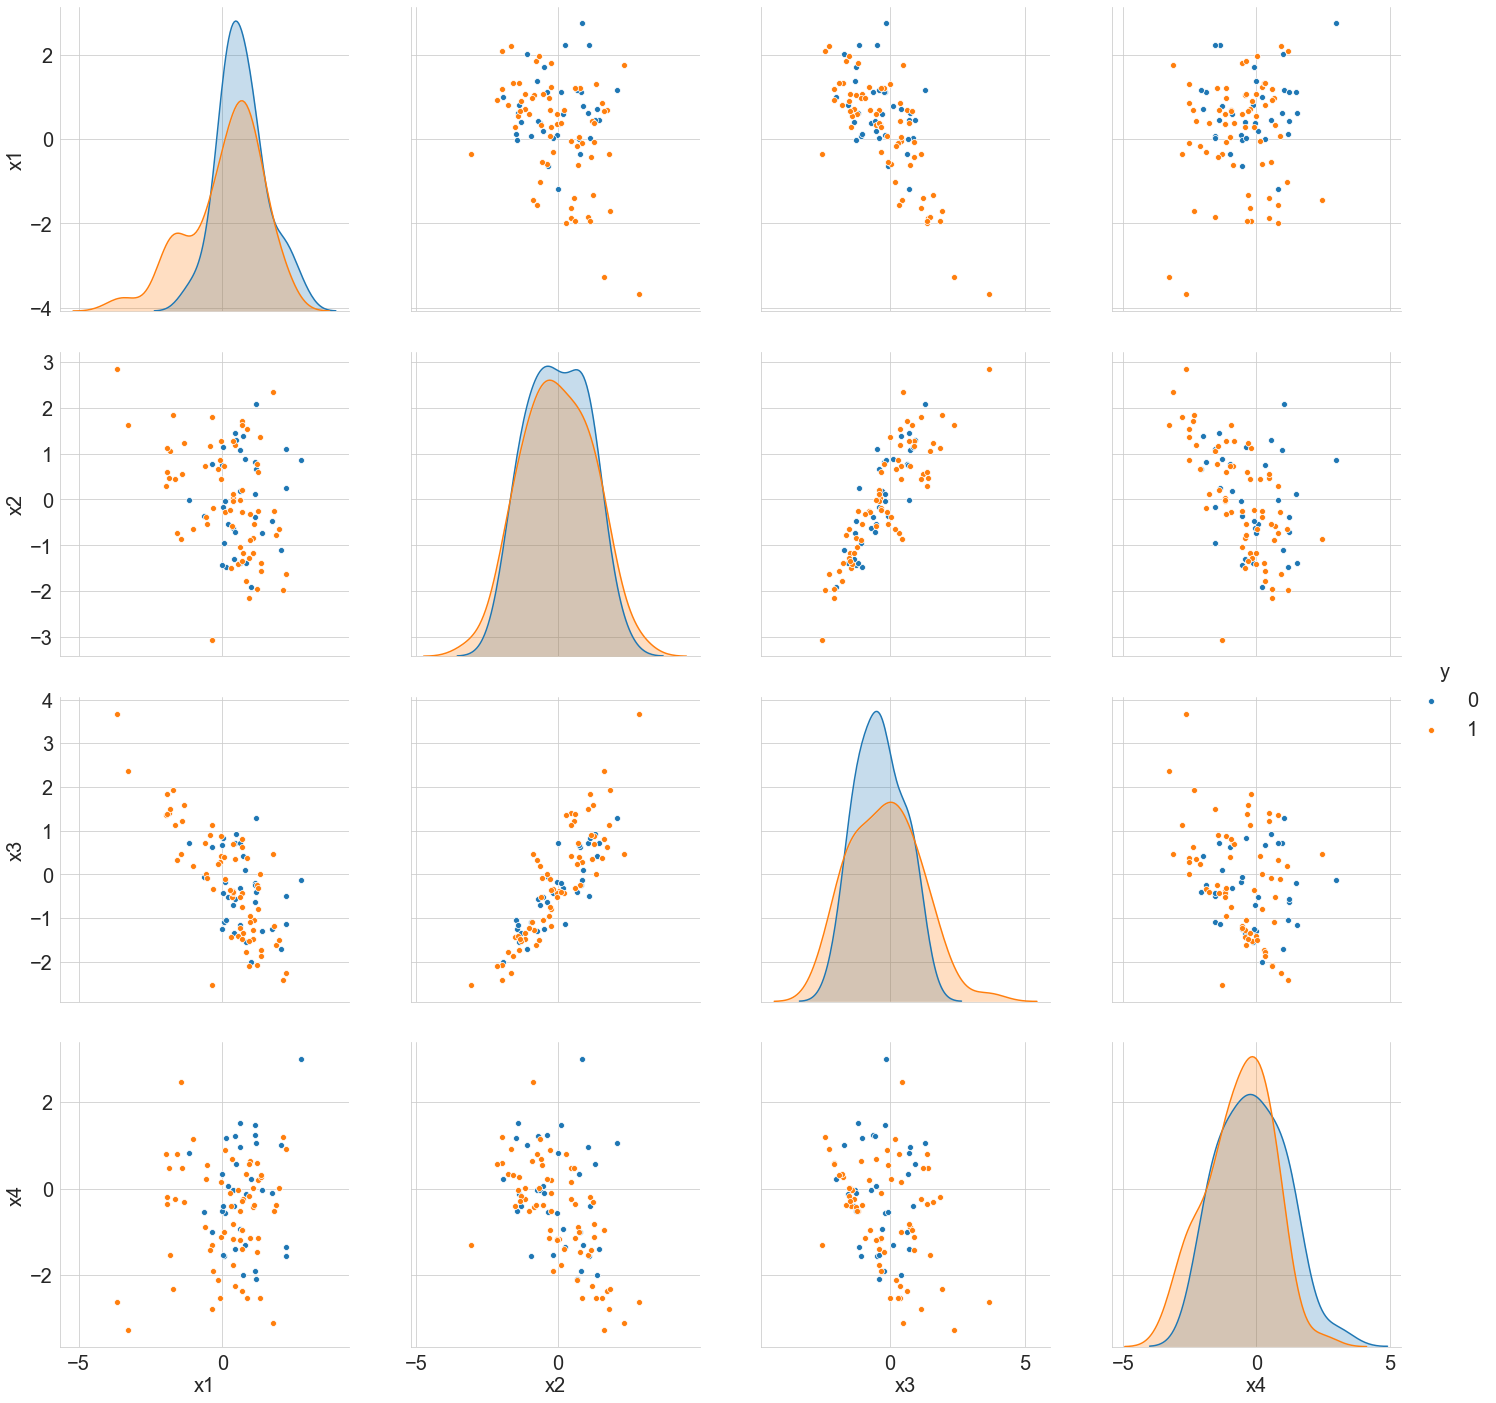

In [46]:
sns.set_style("whitegrid");
plt.rcParams.update({'font.size': 20})
sns.pairplot(synth_dataset_2, hue="y", vars=list(synth_dataset_2.columns.values)[:-1], height=5);
plt.show()

In this case, we can see thath the histograms of all features show a high overlapping, and almost any paired scatter plot shows a clear deifferentiation between classes. We could already expect this due to the scatter plots displayed before.

#### 1.4.3 Box plots:

The boxplot displays the distribution of a certain feature similarly to the histogram but displaying the mean, quartiles, maximum, minimum and outliers.

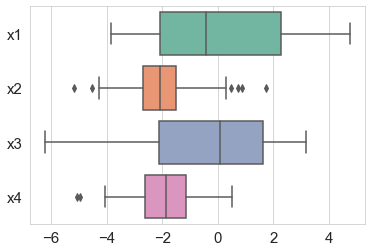

In [47]:
plt.rcParams.update({'font.size': 15})
sns.boxplot(data=synth_dataset_1[list(synth_dataset_1.columns.values)[:-1]], orient="h", palette="Set2")

As we can observe, for the first dataset, there exists a maximum of 8 outliers.

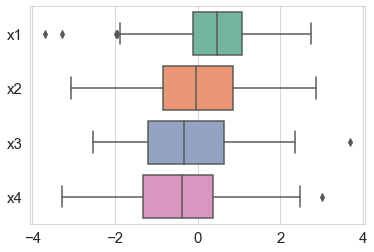

In [48]:
plt.rcParams.update({'font.size': 15})
sns.boxplot(data=synth_dataset_2[list(synth_dataset_2.columns.values)[:-1]], orient="h", palette="Set2")

For the second dataset we only have a maximum of 6 outliers.

It is also interesting to notice that despite the second dataset has a more mixed class distribution than the first dataset, the number of outliers is lower. This just indicates that the classes are pretty overlapped. The outliers affect negatively in the performance of certain classifications algorithms, however for the K Nearest Neighbours and the Random Forest, it is not a big problem.

#### 1.4.4 Dimensionally reduction plots:

The last plot is the dimentsionally reduction scatter plot. It cosists of reducing a N dimensional vector into 2 dimensions in order to be able to plot the points in a graph. This way we can repressent all features with a point in a 2D graph.

(100, 3)


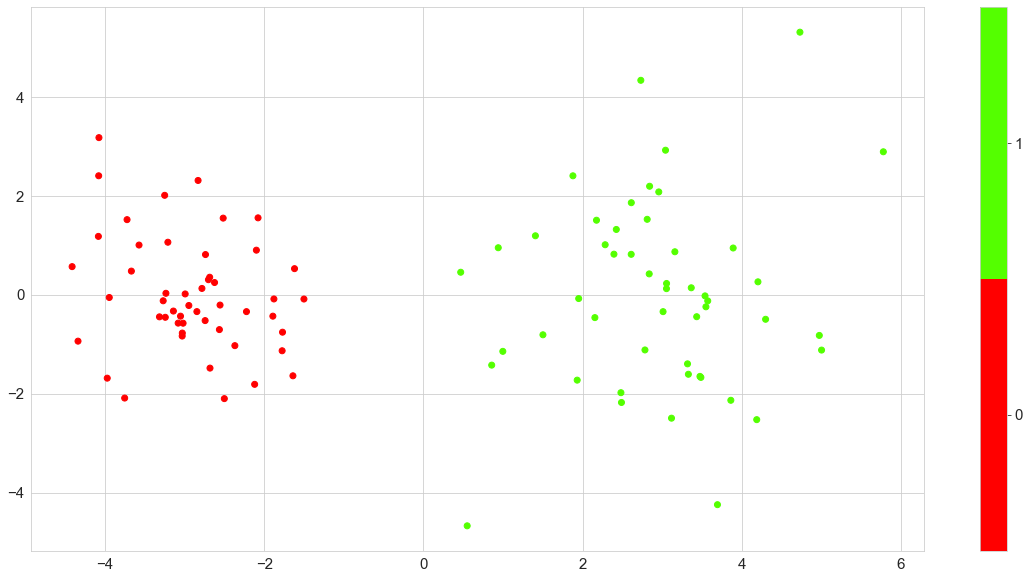

In [49]:
Xpca = PCA(0.9).fit_transform(synth_dataset_1, synth_dataset_1["y"])
print(Xpca.shape)

plt.figure(figsize=(20,10))
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=synth_dataset_1["y"], cmap=plt.cm.get_cmap('prism', 2))
cb = plt.colorbar(ticks=range(2))
cb.set_ticklabels([0,1])

plt.clim(-0.5, 1.5);

Again, we can observe here that the classes of the first dataset are perfectly separated. We expect that the classification algorithms obtain a perfect classification.

(100, 3)


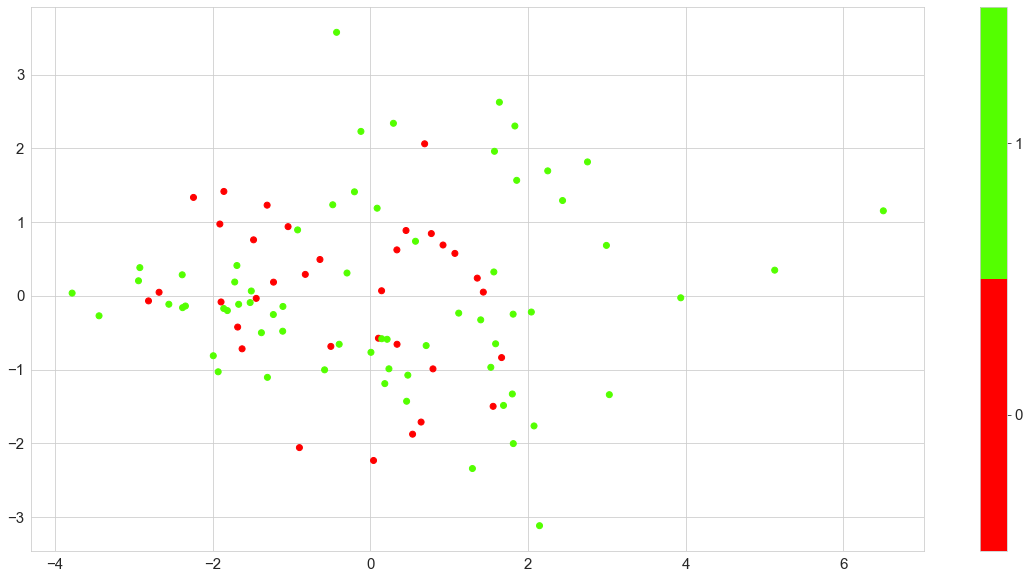

In [50]:
Xpca = PCA(0.9).fit_transform(synth_dataset_2, synth_dataset_1["y"])
print(Xpca.shape)

plt.figure(figsize=(20,10))
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=synth_dataset_2["y"], cmap=plt.cm.get_cmap('prism', 2))
cb = plt.colorbar(ticks=range(2))
cb.set_ticklabels([0,1])

plt.clim(-0.5, 1.5);

However, for the second dataset, after applying the dimensional reduction, it is hard to separate the classes. We check the performance of the classification algorithms later.

### 1.5 Training and Testing:

In this phase we are going to create a big set of models able to classify the elements of our dataset. We will use 2 different machine learning algorithms implemented in the SciKit library:

    - Random Forest
    - K Nearest Neighbours
    
 For each one of them we will tune it hyperparameters and the number of features used as inputs.
 
After each model is trained, we validate it using a 5 Fold Cross Validation. We chose the 5 Fold Cross validation in order to avoid a high variance between models beacuse the number of samples (100) is low compared with other datasets. Next we get the average scores and their variance (1 model and score per fold) in order to rank the best models. Finally, we use the weighted f1-score as the represantation of the model performance, allowing us to select the best model.

In [51]:
#Dividing the datasets

X_1 = synth_dataset_1.iloc[:,:-1]
Y_1 = synth_dataset_1.iloc[:,-1]


X_2 = synth_dataset_2.iloc[:,:-1]
Y_2 = synth_dataset_2.iloc[:,-1]

#### 1.5.1 Random Forest Classification

The first machine learning algorithm is Random Forests. We will tune the number of estimators parameter with the next values: 100, 300, 500, 750, 800, 1200. We will also use a different number of features from 1 to 4 with step of 1 by 1. We will define a function that trains this set of models for a given splitted dataset (X, Y) in order to use it for each dataset.

In [52]:
# Random Forest classification:

def rand_forest_class(X,Y):
    allscores = []

    #Number of estiamtors
    for i in  [100, 300, 500, 750, 800, 1200] :
        scores = []

        #Number of features selected:
        for n in range(1,5):
            print('Random Forests algorithm with ' + str(n) + ' features and ' + str(i) + ' estimators:')
            
            model = RandomForestClassifier(n_estimators = i) 
            scoring = {'accuracy': 'accuracy','precision_weighted': 'precision_weighted','recall_weighted': 'recall_weighted', 'f1_weighted' : 'f1_weighted'}

            cv=StratifiedKFold(n_splits=5)

            X_selection = SelectKBest(f_classif, k=n).fit_transform(X, Y)

            validation_scores = cross_validate(model, X_selection, Y,  scoring=scoring, cv=cv, return_train_score=False)

            print("f1: %0.2f (+/- %0.2f)" % (validation_scores['test_f1_weighted'].mean(), validation_scores['test_f1_weighted'].std() * 2))
            scores.append([n,[validation_scores['test_precision_weighted'].mean(),validation_scores['test_recall_weighted'].mean(),validation_scores['test_f1_weighted'].mean(), validation_scores['test_f1_weighted'].std() * 2]])
        allscores.append([i,scores])
        
    return allscores

We will define a function in that searchs the model configuration with the best performance given the socres list. The model performance is based on the f1 score taking in count the standard deviation between the 5 different models tested for that configuration:

In [53]:
# Looking for the best configuration for Random Forest:

def find_best_model(allscores, X, Y):
    bestf1score = [0,0]

    for i in range(len(allscores)):
        for n in range(len(allscores[i][1])):
            #We check that the new f1 score minus it standard deviation is better than the actual best score minus 
            #it standard deviation
            if  bestf1score[0] - bestf1score[1]/2 < allscores[i][1][n][1][2] - allscores[i][1][n][1][3]/2:
                bestf1score = allscores[i][1][n][1][2:4]         
                features = allscores[i][1][n][0]
                n_estimators = allscores[i][0]

    print("f1-score: " + str(bestf1score[0]) + " (+/-) " + str(bestf1score[1]))
    print("Number of features: " + str(features))
    print("Number of estiamtors: " + str(n_estimators))

    feature_names = list(X.columns.values)
    mask = SelectKBest(score_func=f_classif, k=features).fit(X, Y).get_support() #list of boolean
    new_features = [] # The list of K best features
    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)

    print("Features used: " + str(new_features))

Now we will train and test the models for the first sythetic dataset:

In [54]:
scores = rand_forest_class(X_1,Y_1)

Random Forests algorithm with 1 features and 100 estimators:
f1: 0.97 (+/- 0.05)
Random Forests algorithm with 2 features and 100 estimators:
f1: 0.99 (+/- 0.04)
Random Forests algorithm with 3 features and 100 estimators:
f1: 0.99 (+/- 0.04)
Random Forests algorithm with 4 features and 100 estimators:
f1: 0.99 (+/- 0.04)
Random Forests algorithm with 1 features and 300 estimators:
f1: 0.97 (+/- 0.05)
Random Forests algorithm with 2 features and 300 estimators:
f1: 0.99 (+/- 0.04)
Random Forests algorithm with 3 features and 300 estimators:
f1: 1.00 (+/- 0.00)
Random Forests algorithm with 4 features and 300 estimators:
f1: 0.99 (+/- 0.04)
Random Forests algorithm with 1 features and 500 estimators:
f1: 0.97 (+/- 0.05)
Random Forests algorithm with 2 features and 500 estimators:
f1: 1.00 (+/- 0.00)
Random Forests algorithm with 3 features and 500 estimators:
f1: 1.00 (+/- 0.00)
Random Forests algorithm with 4 features and 500 estimators:
f1: 0.99 (+/- 0.04)
Random Forests algorithm wit

Due to the training process is long, we will save the resulting scores in a file so we do not need to run this code again unless we want to use new parametes.

In [90]:
# Saving the scores:

filename = 'scores/randforest_scores_syn_1.sav'
pickle.dump(scores, open(filename, 'wb'))

In [91]:
# Loading scores

filename = 'scores/randforest_scores_syn_1.sav'
with open(filename, 'rb') as f:
    scores_1 = pickle.load(f)

Next we will find the best model:

In [95]:
find_best_model(scores_1, X_1, Y_1)

f1-score: 1.0 (+/-) 0.0
Number of features: 3
Number of neighbors: 300
Features used: ['x1', 'x3', 'x4']


Now we will do the same process with the second synthetic dataset:

In [58]:
scores_2 = rand_forest_class(X_2,Y_2)

Random Forests algorithm with 1 features and 100 estimators:
f1: 0.67 (+/- 0.14)
Random Forests algorithm with 2 features and 100 estimators:
f1: 0.61 (+/- 0.12)
Random Forests algorithm with 3 features and 100 estimators:
f1: 0.62 (+/- 0.14)
Random Forests algorithm with 4 features and 100 estimators:
f1: 0.59 (+/- 0.12)
Random Forests algorithm with 1 features and 300 estimators:
f1: 0.67 (+/- 0.14)
Random Forests algorithm with 2 features and 300 estimators:
f1: 0.66 (+/- 0.16)
Random Forests algorithm with 3 features and 300 estimators:
f1: 0.60 (+/- 0.11)
Random Forests algorithm with 4 features and 300 estimators:
f1: 0.57 (+/- 0.11)
Random Forests algorithm with 1 features and 500 estimators:
f1: 0.67 (+/- 0.14)
Random Forests algorithm with 2 features and 500 estimators:
f1: 0.64 (+/- 0.12)
Random Forests algorithm with 3 features and 500 estimators:
f1: 0.61 (+/- 0.13)
Random Forests algorithm with 4 features and 500 estimators:
f1: 0.61 (+/- 0.15)
Random Forests algorithm wit

In [59]:
# Saving the scores:

filename = 'scores/randforest_scores_syn_2.sav'
pickle.dump(scores_2, open(filename, 'wb'))

In [60]:
# Loading scores

filename = 'scores/randforest_scores_syn_2.sav'
with open(filename, 'rb') as f:
    scores_2 = pickle.load(f)

In [61]:
find_best_model(scores_2, X_2,Y_2)

f1-score: 0.6698384606024673 (+/-) 0.13910676673898142
Number of features: 1
Number of estiamtors: 100
Features used: ['x1']


Finally we are going to obtain the classification report, the confusion matrix and the decision boundaries for the best model configuration. We will first define the function that plots the decision boundary for each pair of features. It is important to notice that the decision boundaries are fitted with the whole dataset.

In [72]:
def display_decision_boundaries(dataset, model, classifier_name):

    # Parameters
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.02
    labels = [0,1]

    plt.figure(figsize=(14,14))

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):  

        X = dataset.iloc[:,pair]
        Y = dataset.iloc[:,-1]

        X_array = np.array(X)

        clf = model
        clf.fit(X, Y)

        # Plot the decision boundary
        plt.rcParams.update({'font.size': 16})
        plt.subplot(3, 2, pairidx + 1)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_array[:, 0].min() - 1,  X_array[:, 0].max() + 1
        y_min, y_max =  X_array[:, 1].min() - 1,  X_array[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))


        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, levels = 1)

        plt.xlabel(dataset.columns[pair[0]])
        plt.ylabel(dataset.columns[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(X_array[idx, 0], X_array[idx, 1], c=color, label=labels[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

    plt.axis("tight")

    plt.suptitle("Decision surface of the " + classifier_name + " Classifier using paired features")
    plt.legend()
    plt.show()

The final results obtained for the first synthetic dataset are:

In [94]:
find_best_model(scores_1, X_1, Y_1)

f1-score: 1.0 (+/-) 0.0
Number of features: 3
Number of neighbors: 300
Features used: ['x1', 'x3', 'x4']


In [73]:
#We obtain the prediction for each input using the corss_val_predict:

X_selection = SelectKBest(f_classif, k=3).fit_transform(X_1, Y_1)

model = RandomForestClassifier(n_estimators = 300) 

rand_forest_prediction = cross_val_predict(estimator=model, X=X_selection, y=Y_1, cv=StratifiedKFold(n_splits=10))

classes = {'0':0,'1':1}

print(classification_report(Y_1, rand_forest_prediction,target_names=classes.keys()))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [74]:
print(confusion_matrix(y_true = Y_1, y_pred = rand_forest_prediction, sample_weight=None))

[[50  0]
 [ 1 49]]


As we can observe, for the first dataset, we obtain a high scores, having only one wrong classification. This high perfromance is due to the correlation between the label and the features and the distribution of the samples as we can observe in the decision bpundaries:

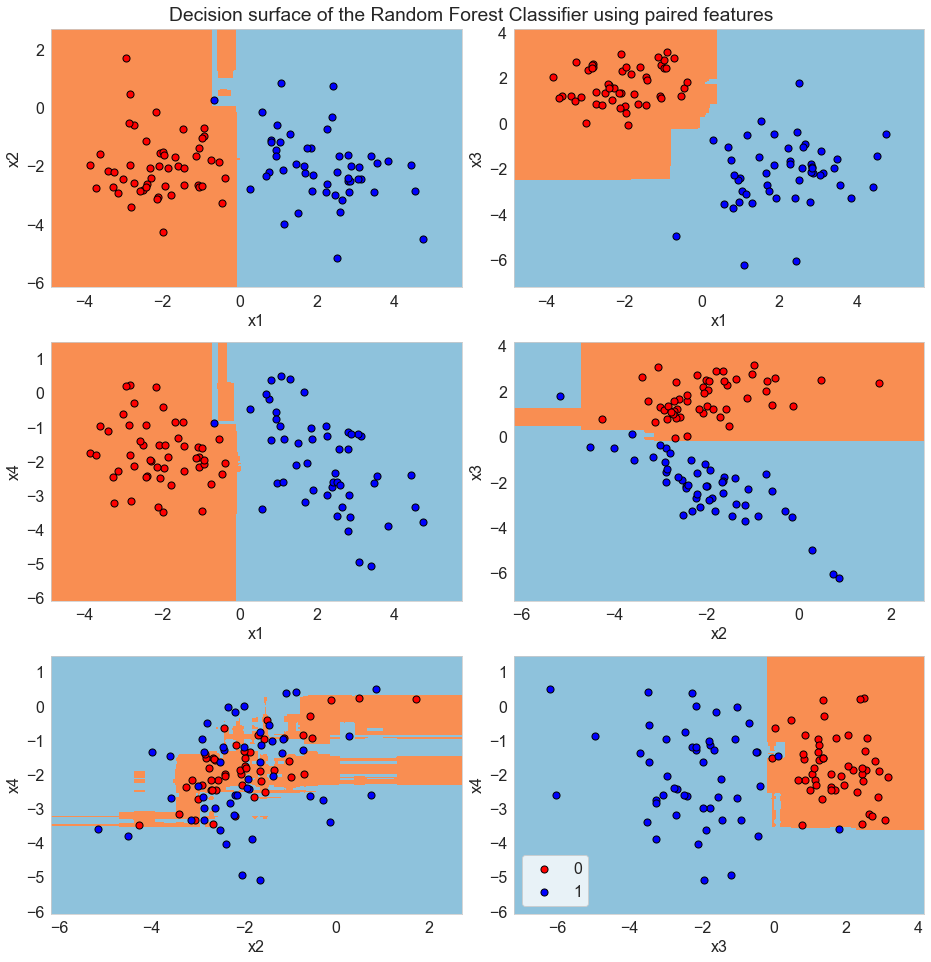

In [75]:
display_decision_boundaries(synth_dataset_1, model, "Random Forest")

The final results obtained for the second synthetic dataset are:

In [96]:
find_best_model(scores_2, X_2,Y_2)

f1-score: 0.6698384606024673 (+/-) 0.13910676673898142
Number of features: 1
Number of neighbors: 100
Features used: ['x1']


In [76]:
#We obtain the prediction for each input using the corss_val_predict:

X_selection = SelectKBest(f_classif, k=1).fit_transform(X_2, Y_2)

model = RandomForestClassifier(n_estimators = 100) 

rand_forest_prediction = cross_val_predict(estimator=model, X=X_selection, y=Y_2, cv=StratifiedKFold(n_splits=10))

classes = {'Benign':0,'Malignant':1}

print(classification_report(Y_2, rand_forest_prediction,target_names=classes.keys()))

              precision    recall  f1-score   support

      Benign       0.54      0.44      0.48        34
   Malignant       0.74      0.80      0.77        66

    accuracy                           0.68       100
   macro avg       0.64      0.62      0.63       100
weighted avg       0.67      0.68      0.67       100



In [77]:
print(confusion_matrix(y_true = Y_2, y_pred = rand_forest_prediction, sample_weight=None))

[[15 19]
 [13 53]]


As we can observe, for the second dataset, the best performance obtained is a weghted averaged f1-score of 0.67. A lower performance for this dataset was expected due to the noise and mixed distribution of the samples in the features space.

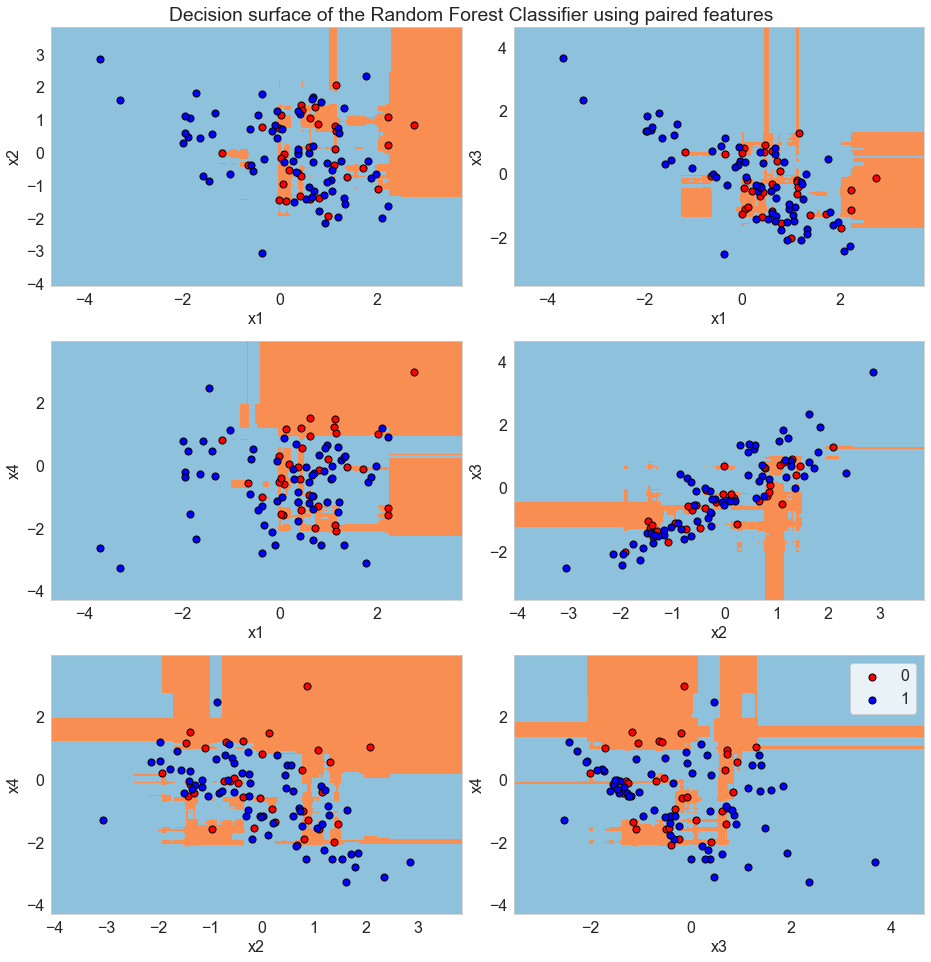

In [78]:
display_decision_boundaries(synth_dataset_2, model, "Random Forest")

#### 1.5.2 K Nearest Neighbours Classification

The second algorithm is K Nearest Neighbours. For this algorithm we will tune the number of neighbours parameter with 3, 5 and 7 and number of features from 1 to 4 with step of 1 by 1. Similarly to what we did with the Random Forest Classifier, we will define first a funtion that trains this set of models for a given splitted dataset (X, Y).

In [79]:
# kNN classification:

def knn_class(X,Y):
   
    allscores = []

    #Number of neighbors
    for i in [3,5,7]:
        scores = []

        #Number of features selected:
        for n in range(1,5):

            print('K-NN algorithm with ' + str(n) + ' features and ' + str(i) + ' neighbors:')

            # Slecting k most important variables and training:

            X_selection = SelectKBest(f_classif, k=n).fit_transform(X, Y)
            model = KNeighborsClassifier(n_neighbors=i)   
            scoring = {'accuracy': 'accuracy','precision_weighted': 'precision_weighted','recall_weighted': 'recall_weighted', 'f1_weighted' : 'f1_weighted'}

            cv=StratifiedKFold(n_splits=10)
            validation_scores = cross_validate(model, X_selection, Y,  scoring=scoring, cv=cv, return_train_score=False)

            print("f1: %0.2f (+/- %0.2f)" % (validation_scores['test_f1_weighted'].mean(), validation_scores['test_f1_weighted'].std() * 2))

            scores.append([n,[validation_scores['test_precision_weighted'].mean(),validation_scores['test_recall_weighted'].mean(),validation_scores['test_f1_weighted'].mean(), validation_scores['test_f1_weighted'].std() * 2]])
        allscores.append([i,scores])
        
    return allscores

Secondly, we define the function that finds the best model for a given scores set. The model performance is based on the f1 score taking in count the standard deviation between the 5 different models tested for that configuration:

In [80]:
# Looking for the best configuration for Knn:

def find_best_model(allscores, X, Y):

    bestf1score = [0,0]

    for i in range(len(allscores)):
        for n in range(len(allscores[i][1])):
            #We check that the new f1 score minus it standard deviation is better than the actual best score minus 
            #it standard deviation
            if  bestf1score[0] - bestf1score[1]/2 < allscores[i][1][n][1][2] - allscores[i][1][n][1][3]/2:
                bestf1score = allscores[i][1][n][1][2:4]         
                features = allscores[i][1][n][0]
                n_neighbors = allscores[i][0]

    print("f1-score: " + str(bestf1score[0]) + " (+/-) " + str(bestf1score[1]))
    print("Number of features: " + str(features))
    print("Number of neighbors: " + str(n_neighbors))

    feature_names = list(X.columns.values)
    mask = SelectKBest(score_func=f_classif, k=features).fit(X, Y).get_support() #list of boolean
    new_features = [] # The list of K best features
    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)

    print("Features used: " + str(new_features))


First, we will train and test the set of models for the first synthetic dataset.

In [81]:
scores_3 = knn_class(X_1,Y_1)

K-NN algorithm with 1 features and 3 neighbors:
f1: 0.99 (+/- 0.06)
K-NN algorithm with 2 features and 3 neighbors:
f1: 1.00 (+/- 0.00)
K-NN algorithm with 3 features and 3 neighbors:
f1: 1.00 (+/- 0.00)
K-NN algorithm with 4 features and 3 neighbors:
f1: 1.00 (+/- 0.00)
K-NN algorithm with 1 features and 5 neighbors:
f1: 0.99 (+/- 0.06)
K-NN algorithm with 2 features and 5 neighbors:
f1: 1.00 (+/- 0.00)
K-NN algorithm with 3 features and 5 neighbors:
f1: 1.00 (+/- 0.00)
K-NN algorithm with 4 features and 5 neighbors:
f1: 1.00 (+/- 0.00)
K-NN algorithm with 1 features and 7 neighbors:
f1: 0.99 (+/- 0.06)
K-NN algorithm with 2 features and 7 neighbors:
f1: 1.00 (+/- 0.00)
K-NN algorithm with 3 features and 7 neighbors:
f1: 1.00 (+/- 0.00)
K-NN algorithm with 4 features and 7 neighbors:
f1: 1.00 (+/- 0.00)


As explained before, we will save the scores.

In [82]:
# Saving the scores:

filename = 'scores/knn_scores_syn_1.sav'
pickle.dump(scores_3, open(filename, 'wb'))

In [83]:
# Loading scores

filename = 'scores/knn_scores_syn_1.sav'
with open(filename, 'rb') as f:
    scores_3 = pickle.load(f)

Now we obtain the best model for the first synthectic dataset:

In [84]:
find_best_model(scores_3, X_1,Y_1)

f1-score: 1.0 (+/-) 0.0
Number of features: 2
Number of neighbors: 3
Features used: ['x1', 'x3']


Secondly, we will train and test the set of models for the second synthetic dataset.

In [85]:
scores_4 = knn_class(X_2,Y_2)

K-NN algorithm with 1 features and 3 neighbors:
f1: 0.72 (+/- 0.28)
K-NN algorithm with 2 features and 3 neighbors:
f1: 0.66 (+/- 0.37)
K-NN algorithm with 3 features and 3 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.62 (+/- 0.27)
K-NN algorithm with 4 features and 3 neighbors:
f1: 0.64 (+/- 0.34)
K-NN algorithm with 1 features and 5 neighbors:
f1: 0.67 (+/- 0.39)
K-NN algorithm with 2 features and 5 neighbors:
f1: 0.63 (+/- 0.32)
K-NN algorithm with 3 features and 5 neighbors:
f1: 0.65 (+/- 0.29)
K-NN algorithm with 4 features and 5 neighbors:
f1: 0.55 (+/- 0.28)
K-NN algorithm with 1 features and 7 neighbors:
f1: 0.65 (+/- 0.38)
K-NN algorithm with 2 features and 7 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.66 (+/- 0.28)
K-NN algorithm with 3 features and 7 neighbors:
f1: 0.62 (+/- 0.22)
K-NN algorithm with 4 features and 7 neighbors:
f1: 0.58 (+/- 0.20)


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

In [86]:
# Saving the scores:

filename = 'scores/knn_scores_syn_2.sav'
pickle.dump(scores_4, open(filename, 'wb'))

In [87]:
# Loading scores

filename = 'scores/knn_scores_syn_2.sav'
with open(filename, 'rb') as f:
    scores_4 = pickle.load(f)

Now we obtain the best model for the second synthectic dataset:

In [88]:
find_best_model(scores_4, X_2,Y_2)

f1-score: 0.7240488139311669 (+/-) 0.2799351703042359
Number of features: 1
Number of neighbors: 3
Features used: ['x1']


Finally we are going to obtain the classification report, the confusion matrix and the decision boundaries for the best model configuration. 

The final results obtained for the first synthetic dataset are:

In [89]:
find_best_model(scores_3, X_1,Y_1)

f1-score: 1.0 (+/-) 0.0
Number of features: 2
Number of neighbors: 3
Features used: ['x1', 'x3']


In [97]:
#We obtain the prediction for each input using the corss_val_predict:

X_selection = SelectKBest(f_classif, k=2).fit_transform(X_1, Y_1)

model = KNeighborsClassifier(n_neighbors=3)

knn_prediction = cross_val_predict(estimator=model, X=X_selection, y=Y_1, cv=StratifiedKFold(n_splits=10))

classes = {'0':0,'1':1}

print(classification_report(Y_1, knn_prediction ,target_names=classes.keys()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [98]:
print(confusion_matrix(y_true = Y_1, y_pred = knn_prediction, sample_weight=None))

[[50  0]
 [ 0 50]]


As we can observe, the K Nearest Neighbours classifier obtains the perfect classification for the first synthetic dataset. Next we will display the decission boundaries of this model:

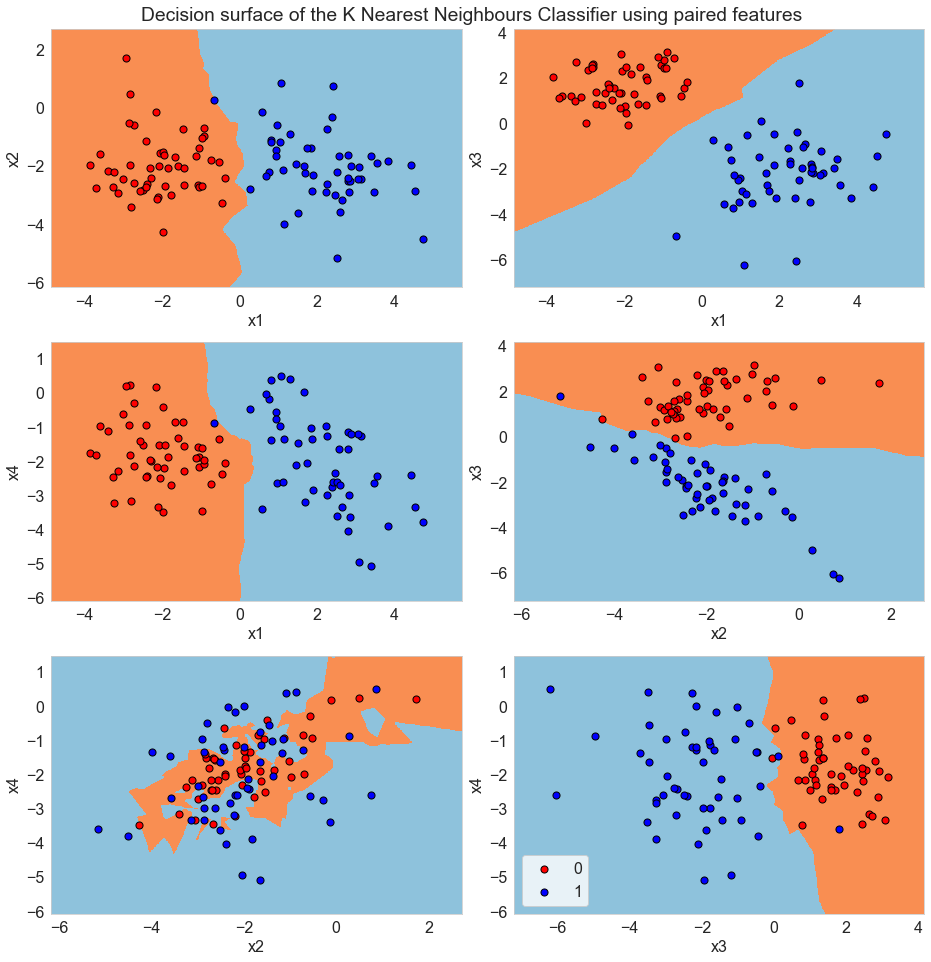

In [100]:
display_decision_boundaries(synth_dataset_1, model, "K Nearest Neighbours")

The final results obtained for the second synthetic dataset are:

In [101]:
find_best_model(scores_4, X_2,Y_2)

f1-score: 0.7240488139311669 (+/-) 0.2799351703042359
Number of features: 1
Number of neighbors: 3
Features used: ['x1']


In [102]:
#We obtain the prediction for each input using the corss_val_predict:

X_selection = SelectKBest(f_classif, k=1).fit_transform(X_2, Y_2)

model = KNeighborsClassifier(n_neighbors=3)

knn_prediction = cross_val_predict(estimator=model, X=X_selection, y=Y_2, cv=StratifiedKFold(n_splits=10))

classes = {'0':0,'1':1}

print(classification_report(Y_2, knn_prediction ,target_names=classes.keys()))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        34
           1       0.76      0.88      0.82        66

    accuracy                           0.74       100
   macro avg       0.71      0.67      0.68       100
weighted avg       0.73      0.74      0.73       100



In [103]:
print(confusion_matrix(y_true = Y_2, y_pred = knn_prediction, sample_weight=None))

[[16 18]
 [ 8 58]]


If we compare the best result of the K Nearest Neighbours with the best result of the Random Forest, we can conclude that the Knn has a better performance for the second dataset.

Finally, we display the decission boudnaries of the Knn algorithm for the second dataset

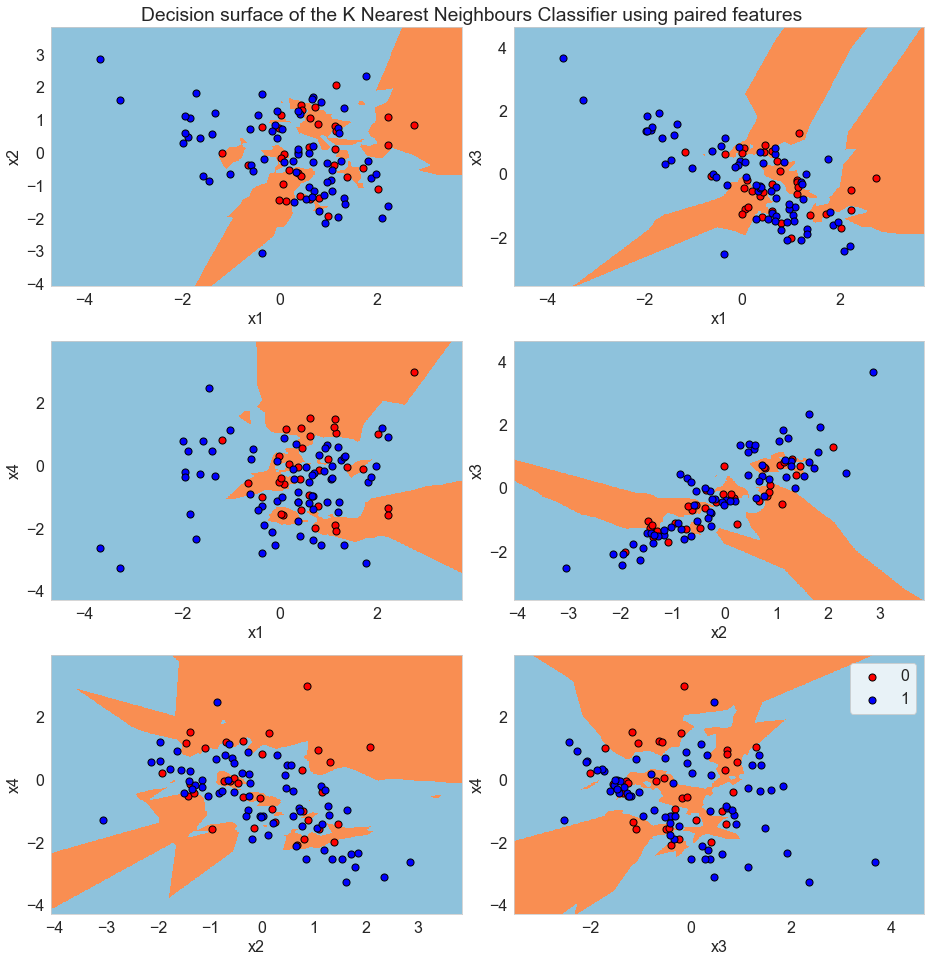

In [104]:
display_decision_boundaries(synth_dataset_2, model, "K Nearest Neighbours")

## 2.Real World Dataset

For the second part of this project we are going to use a real world dataset provided by Kaggle. This dataset is a list of all pokemon with their information like Attack Points, Type, Color... In this case the classification problem will consits of predicting the Pokemon Type based in the others features. There exists a total of 18 pokemon types. This is a complex classification problem due to the elevated number of classes.

### 2.1 Loading the Dataset:

First of all, we load the dataset from the local directory.

In [106]:
#Load the Dataset

dataset = pd.read_csv('Pokemon Dataset/pokemon_alopez247.csv')

dataset.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


### 2.2 Data Analysis:

Now we will obtain the basic information of the dataset before we move on to the preprocessing:

In [107]:
# Basic information of the Dataset

print("Size of the Dataset:")
print(dataset.shape)

Size of the Dataset:
(721, 23)


As we can see we have a total of 721 rows, this means 721 pokemons. For each Pokemon we have 23 characteristics or features. We are interested in the Type 1 feature since this will be used as the Label.

Next, we onbtain the type of each feature:

In [108]:
print("\n" + "Checking the type of each feature:")
print(dataset.dtypes)


Checking the type of each feature:
Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object


As we can observe, we have a total of 7 features that are Object types and 2 boolean features. In the preprocessing phase we will convert these variables into numeric values in roder to make this information apt for the machine learning algorithms.

Now we will display the statistical information of the numeric featues:

In [109]:
print("\n" + "Statistical information:")
dataset.describe()


Statistical information:


,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


As we can see, features values vary in different ranges so, in the preprocessing phase we will normalize the values. This normailzation is required mainly for the K Nearest Neighbours algorithm since its based on Euclidian distances. The normalization also helps to reduce the computing time invested in training.

### 2.3. Preprocessing:

Now we are going to process the information in order to adapt it for the training stage:

First we will check the class balance:

In [110]:
#Starting the preprocessing

print("\n" + "Checking if the Dataset is balanced")
print(dataset.groupby('Type_1').size())


Checking if the Dataset is balanced
Type_1
Bug          63
Dark         28
Dragon       24
Electric     36
Fairy        17
Fighting     25
Fire         47
Flying        3
Ghost        23
Grass        66
Ground       30
Ice          23
Normal       93
Poison       28
Psychic      47
Rock         41
Steel        22
Water       105
dtype: int64


As we can observe the classes are unbalanced, having in some cases too few samples for a determined Type. The classes with a low representation will be too hard to detect for the classifier. This should not be a big issue for the K Nearest Neighbours classifier, however for the Random Forest classifier we will use class weights in order to counter the dataset imbalance.

Firstly we will remove the columns Egg_Group_1 and Egg_Group_2 since this two columns contain in certain cases the Type_1 of the pokemon:

In [111]:
dataset = dataset.drop(["Egg_Group_1", "Egg_Group_2"], axis=1)

Next we will check if the dataset has null values:

In [112]:
print("Checking for null values")
print(dataset.isnull().sum()[dataset.isnull().sum() > 0])

Checking for null values
Type_2     371
Pr_Male     77
dtype: int64


As we can see, we have null values and features whose values are non object type. We are going to replace the null values by zero.

In [113]:
dataset.fillna(0, inplace = True)

Now, we will check which columns contain object type values:

In [114]:
print("\n" + "Checking for objet types")
print(dataset.dtypes[dataset.dtypes == object])


Checking for objet types
Name          object
Type_1        object
Type_2        object
Color         object
Body_Style    object
dtype: object


We convert the object type values to a numeric value using the function described bellow.

This function assings consecutives integers to each unique object value.

This function has been copied from: https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/

In [115]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

We will use this function to convert all object type values into numerical value. Finally, we add the Type_1 column at the end of the dataset as the Label.

In [116]:
numerical_dataset =  handle_non_numerical_data(dataset.drop(["Type_1"], axis=1))

In [117]:
numerical_dataset =  numerical_dataset.join(dataset["Type_1"])

Finally, due to the Number and Name columns have a unique value for each pokemon, they do not provide any additional information, therefore, we drop them from the original dataset.

In [118]:
numerical_dataset.drop(["Number", "Name"], axis=1, inplace = True)

Checking again for null or NaN values and object types.

In [119]:
print("Checking for null values")
print(numerical_dataset.isnull().sum()[numerical_dataset.isnull().sum() > 0])

print("\n" + "Checking for objet types")
print(numerical_dataset.dtypes[numerical_dataset.dtypes == object])

Checking for null values
Series([], dtype: int64)

Checking for objet types
Type_1    object
dtype: object


As we noticed before, there are big differences in the value ranges of different features, now we will normalize the data in order to have all the information in a common scale. This will also make the training process faster. 

In [120]:
names = numerical_dataset.columns[:-1]
scaler = MinMaxScaler() 
scaled_dataset = scaler.fit_transform(numerical_dataset.iloc[:,:-1])
scaled_dataset = pd.DataFrame(scaled_dataset, columns=names)
scaled_dataset =  scaled_dataset.join(dataset["Type_1"])

We obtain the new size of the dataset after removing the unnecesary or not allowed columns:

In [121]:
print("Size of the Dataset:")
print(scaled_dataset.shape)

Size of the Dataset:
(721, 19)


In [122]:
scaled_dataset.head()

,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Type_1
0,0.777778,0.255556,0.173228,0.27500,0.195556,0.381944,0.214286,0.258065,0.0,0.0,0.666667,1.0,0.875,0.0,0.042361,0.007159,0.166667,0.769231,Grass
1,0.777778,0.416667,0.232283,0.35625,0.257778,0.486111,0.285714,0.354839,0.0,0.0,0.666667,1.0,0.875,0.0,0.061806,0.013580,0.166667,0.769231,Grass
2,0.777778,0.638889,0.311024,0.48125,0.346667,0.625000,0.380952,0.483871,0.0,0.0,0.666667,1.0,0.875,1.0,0.132639,0.105169,0.166667,0.769231,Grass
3,0.000000,0.238889,0.149606,0.29375,0.168889,0.347222,0.142857,0.387097,0.0,0.0,0.333333,1.0,0.875,0.0,0.035417,0.008843,0.166667,0.846154,Fire
4,0.000000,0.416667,0.224409,0.36875,0.235556,0.486111,0.214286,0.483871,0.0,0.0,0.333333,1.0,0.875,0.0,0.068750,0.019897,0.166667,0.846154,Fire


The dataset is now ready for the next step.

### 2.4 Data Visualization:

Similarly to the synthetic dataset, we will obtain some basic represetations of the data in order to obtain some understanding of the information distribution. We will display the next graphs:
    
    - Paired scatter plots
    - Pair plots distributions
    - Box plots
    - Dimensionally reduction plots

As the number of features is elevated, we are going to select the 4 most important variables.

#### 2.4.1 Paired Scatter Plot:

This representation displays the values of two features as a point per each dataset row in a 2D graph.

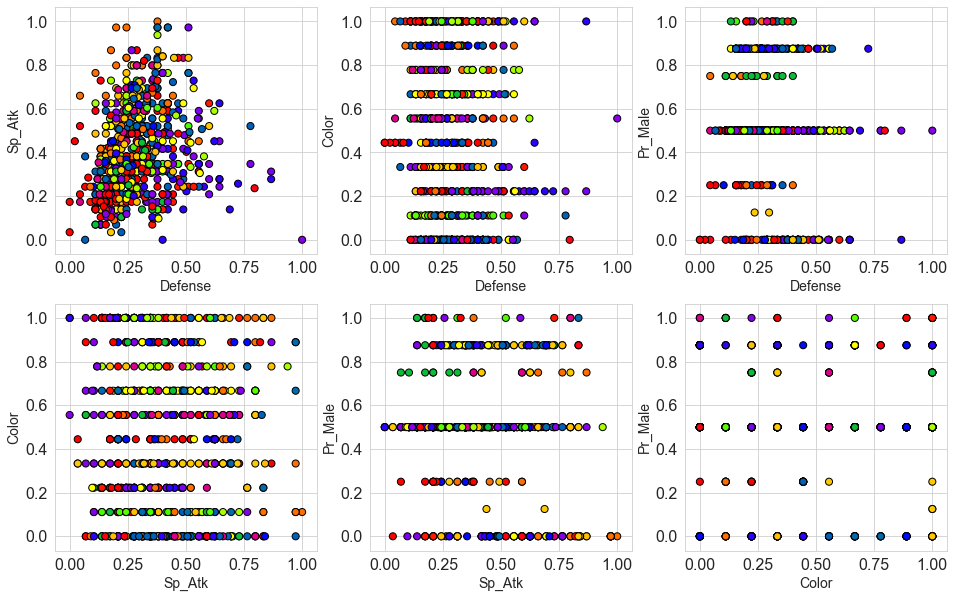

In [123]:
#First we select the k most important features to display:
feature_names = list(scaled_dataset.iloc[:,:-1].columns.values)
mask = SelectKBest(f_classif, k=4).fit(scaled_dataset.iloc[:,:-1], scaled_dataset.iloc[:,-1]).get_support()
selected_features = [] # The list of K best features
for bool, feature in zip(mask, feature_names):
    if bool:
        selected_features.append(feature)

#Next we set the color map absed on the pokemon type:
types_list = list(scaled_dataset["Type_1"])
number_types_list = []
types_dict = {"Normal": 1, "Water": 2, "Fire": 3, "Bug": 4, "Poison": 5, "Ground": 6, "Fairy": 7, "Grass": 8, "Electric": 9,
             'Fighting': 10, 'Psychic': 11, 'Rock': 12, 'Ghost': 13, 'Ice': 14, 'Dragon': 15, 'Dark': 16, 'Steel': 17, 'Flying': 18}
for i in types_list:
    number_types_list.append(types_dict[i])
    
number_types_list =  np.array(number_types_list)
number_types_list = number_types_list/np.amax(number_types_list)

#Finally, we plot the Paired Scatter Plot:
lst_var=list(combinations(selected_features,2))
plt.figure(figsize=(16,10))

for i in range(1,len(lst_var)+1):
    plt.subplot(2,ceil(len(lst_var)/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(scaled_dataset[var1],scaled_dataset[var2],c=number_types_list,s=50, edgecolor='k', 
                cmap=plt.cm.get_cmap('prism', 18))
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

As we can see, it is hard to obtain information from the scatter plots due to the elevated number of points and the high number of classes. We can assert that the class mixture is elevated making pretty hard to obtain a good classification.

#### 2.4.2 Pair plots distributions:

The pair plots distributions show the paired scatter plots and the histogram of each feature divided by classes. This representations allow us to obtain a quick impression of how well defined are classes and the overlapping between them (based on the histograms). For a higher overlapping of classes (overlapping of histagrams), the classification task will be harder.

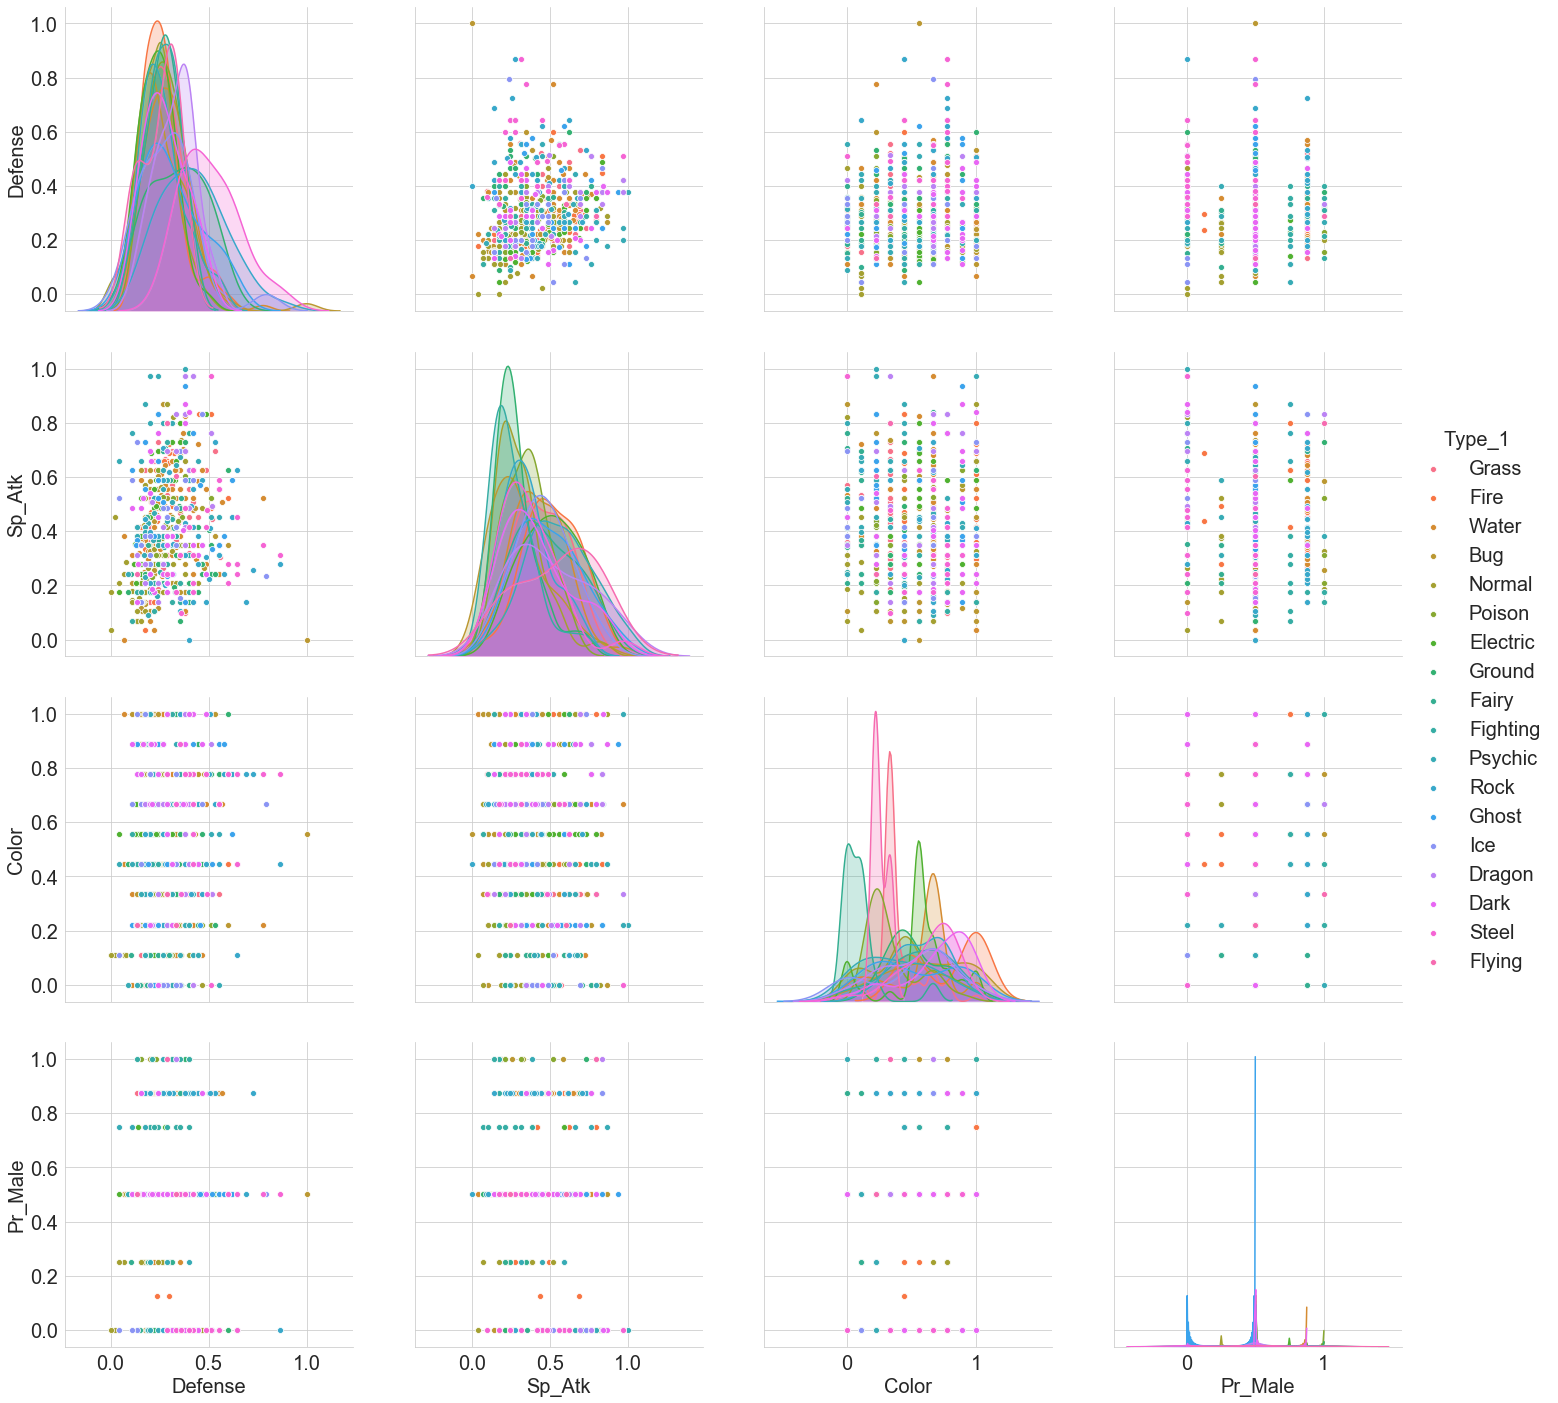

In [498]:
sns.set_style("whitegrid");
plt.rcParams.update({'font.size': 20})
sns.pairplot(scaled_dataset, hue="Type_1", vars=selected_features, height=5);
plt.show()

In the histograms we can see the big overlapping between classes. However in the Color feature histogram, we can see that the feature may be helpful for the classification task.

#### 2.4.3 Box plots:

The boxplot displays the distribution of a certain feature similarly to the histogram but displaying the mean, quartiles, maximum, minimum and outliers.

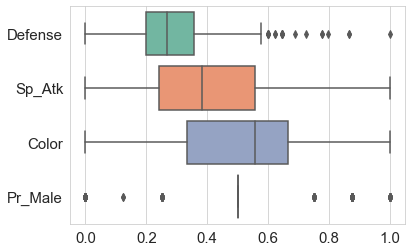

In [499]:
plt.rcParams.update({'font.size': 15})
sns.boxplot(data=scaled_dataset[selected_features], orient="h", palette="Set2")

We can not estimate the exact number of outliers, we can only afirm that there exists. In the Probablitiy of Male we can see that all values different from 0.5 (50%) are outliers.

#### 2.4.4 Dimensionally reduction plots:

The last plot is the dimentsionally reduction scatter plot. It cosists of reducing a N dimensional vector into 2 dimensions in order to be able to plot the points in a graph. This way we can repressent all features with a point in a 2D graph.

In [500]:
types_list = list(scaled_dataset["Type_1"])
number_types_list = []
types_dict = {"Dark": 1 , "Ghost": 2, "Poison": 3, "Psychic": 4, "Water": 5, "Ice": 6, "Fairy": 7, "Normal": 8, "Fighting": 9, 
              "Bug": 10, "Grass": 11, "Electric": 12, "Steel": 13, "Ground": 14, "Rock": 15, "Fire": 16, "Dragon": 17, "Flying": 18}
for i in types_list:
    number_types_list.append(types_dict[i])
    
Xpca = PCA(2).fit_transform(scaled_dataset.iloc[:,:-1])
Xpca.shape

(721, 2)

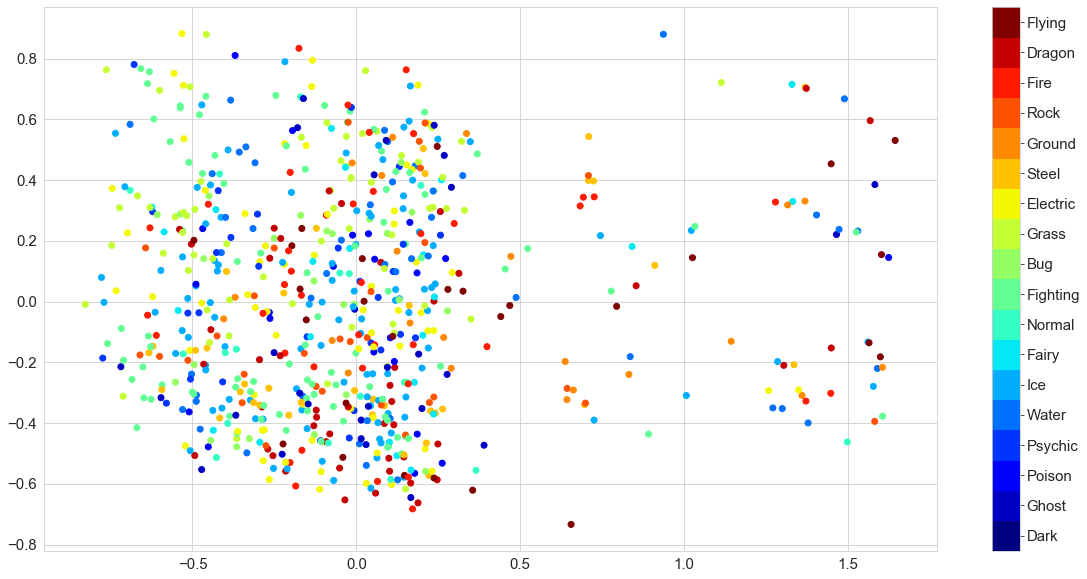

In [501]:
plt.figure(figsize=(20,10))
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=number_types_list, cmap=plt.cm.get_cmap('jet', 18))
cb = plt.colorbar(ticks=range(18))
cb.set_ticklabels(["Dark", "Ghost", "Poison", "Psychic", "Water", "Ice", "Fairy", "Normal", "Fighting", "Bug", "Grass", 
    "Electric", "Steel", "Ground", "Rock", "Fire", "Dragon", "Flying"])

plt.clim(-0.5, 17.5);


Finally, in the dimensionally reduction plot we can observe the high mixture of classes. This is the reason why we do not expect a good result from the classification algorithms.

### 2.5 Training and Testing:

Finally and similarly to the synthetic dataset, we are going to create a big set of models able to classify the elements of our dataset. We will use 2 different machine learning algorithms all of them implemented in the SciKit library:

    - Random Forest
    - K Nearest Neighbours
    
 For each one of them we will tune it hyperparameters and the number of features used as inputs.
 
After each model is trained, we validate it using a 10 Fold Cross Validation. Next we get the average scores and their variance (1 model and score per fold) in order to rank the best models. Finally, we use the weighted f1-score as the represantation of the model performance, allowing us to select the best model.

In [534]:
#Dividing the datasets

X = scaled_dataset.iloc[:,:-1]
Y = scaled_dataset.iloc[:,-1]

#### 2.5.1 Random Forest Classification

The first machine learning algorithm is Random Forests. We will tune the number of estimators parameter with the next values: 100, 300, 500, 750, 900. We will also use a different number of features from 1 to 16 with step of 3 by 3.

In [505]:
# Random Forest classification:

allscores = []

#Number of estiamtors
for i in  [100, 300, 500, 750, 900]:
    scores = []

    #Number of features selected:
    for n in range(1, 17, 3):
        print('Random Forests algorithm with ' + str(n) + ' features and ' + str(i) + ' estimators:')

        model = RandomForestClassifier(n_estimators = i, class_weight = "balanced") 
        scoring = {'accuracy': 'accuracy','precision_weighted': 'precision_weighted','recall_weighted': 'recall_weighted', 'f1_weighted' : 'f1_weighted'}

        cv=StratifiedKFold(n_splits=10)

        X_selection = SelectKBest(f_classif, k=n).fit_transform(X, Y)

        validation_scores = cross_validate(model, X_selection, Y,  scoring=scoring, cv=cv, return_train_score=False)

        print("f1: %0.2f (+/- %0.2f)" % (validation_scores['test_f1_weighted'].mean(), validation_scores['test_f1_weighted'].std() * 2))
        scores.append([n,[validation_scores['test_precision_weighted'].mean(),validation_scores['test_recall_weighted'].mean(),validation_scores['test_f1_weighted'].mean(), validation_scores['test_f1_weighted'].std() * 2]])
    allscores.append([i,scores])

Random Forests algorithm with 1 features and 100 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fer

f1: 0.22 (+/- 0.05)
Random Forests algorithm with 4 features and 100 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.27 (+/- 0.12)
Random Forests algorithm with 7 features and 100 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.33 (+/- 0.12)
Random Forests algorithm with 10 features and 100 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.36 (+/- 0.15)
Random Forests algorithm with 13 features and 100 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.36 (+/- 0.16)
Random Forests algorithm with 16 features and 100 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.33 (+/- 0.09)
Random Forests algorithm with 1 features and 300 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.21 (+/- 0.07)
Random Forests algorithm with 4 features and 300 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.28 (+/- 0.11)
Random Forests algorithm with 7 features and 300 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.34 (+/- 0.08)
Random Forests algorithm with 10 features and 300 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.37 (+/- 0.12)
Random Forests algorithm with 13 features and 300 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.34 (+/- 0.15)
Random Forests algorithm with 16 features and 300 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.34 (+/- 0.14)
Random Forests algorithm with 1 features and 500 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.21 (+/- 0.05)
Random Forests algorithm with 4 features and 500 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.29 (+/- 0.12)
Random Forests algorithm with 7 features and 500 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.33 (+/- 0.08)
Random Forests algorithm with 10 features and 500 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.37 (+/- 0.12)
Random Forests algorithm with 13 features and 500 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.35 (+/- 0.15)
Random Forests algorithm with 16 features and 500 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.34 (+/- 0.14)
Random Forests algorithm with 1 features and 750 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.22 (+/- 0.07)
Random Forests algorithm with 4 features and 750 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.28 (+/- 0.11)
Random Forests algorithm with 7 features and 750 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.34 (+/- 0.09)
Random Forests algorithm with 10 features and 750 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.37 (+/- 0.13)
Random Forests algorithm with 13 features and 750 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.35 (+/- 0.15)
Random Forests algorithm with 16 features and 750 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.34 (+/- 0.11)
Random Forests algorithm with 1 features and 900 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.21 (+/- 0.05)
Random Forests algorithm with 4 features and 900 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.28 (+/- 0.11)
Random Forests algorithm with 7 features and 900 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.34 (+/- 0.09)
Random Forests algorithm with 10 features and 900 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.37 (+/- 0.12)
Random Forests algorithm with 13 features and 900 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fer

f1: 0.35 (+/- 0.17)
Random Forests algorithm with 16 features and 900 estimators:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.34 (+/- 0.13)


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The warning displayed is due to we do not get any element classified as a certain class. This was expected for the minority classes.

Due to the training process is long, we will save the resulting scores in a file so we do not need to run this code again unless we want to use new parametes.

In [506]:
# Saving the scores:

filename = 'scores/randforest_scores_real_1.sav'
pickle.dump(allscores, open(filename, 'wb'))

In [535]:
# Loading scores

filename = 'scores/randforest_scores_real_1.sav'
with open(filename, 'rb') as f:
    allscores = pickle.load(f)

Next we will find the best model from the set of the trained models based on the f1-score:

In [536]:
# Looking for the best configuration for Random Forest:

bestf1score = [0,0]

for i in range(len(allscores)):
    for n in range(len(allscores[i][1])):
        #We check that the new f1 score minus it standard deviation is better than the actual best score minus 
        #it standard deviation
        if  bestf1score[0] - bestf1score[1]/2 < allscores[i][1][n][1][2] - allscores[i][1][n][1][3]/2:
            bestf1score = allscores[i][1][n][1][2:4]         
            features = allscores[i][1][n][0]
            n_estimators = allscores[i][0]

print("f1-score: " + str(bestf1score[0]) + " (+/-) " + str(bestf1score[1]))
print("Number of features: " + str(features))
print("Number of estiamtors: " + str(n_estimators))

feature_names = list(X.columns.values)
mask = SelectKBest(score_func=f_classif, k=features).fit(X, Y).get_support() #list of boolean
new_features = [] # The list of K best features
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

print("Features used: " + str(new_features))

f1-score: 0.37063408258464603 (+/-) 0.11546779308075543
Number of features: 10
Number of estiamtors: 900
Features used: ['Type_2', 'Attack', 'Defense', 'Sp_Atk', 'Speed', 'Color', 'hasGender', 'Pr_Male', 'Weight_kg', 'Body_Style']


Once we have found the best configuration for the Random Forest algorithm, we are going to obtain the classification report, the confusion matrix and the decision boundaries for the best model configuration. It is important to remark that the decision boundaries are fitted with the whole dataset.

In [537]:
#We obtain the prediction for each input using the corss_val_predict:

X_selection = SelectKBest(f_classif, k=10).fit_transform(X, Y)

model = RandomForestClassifier(n_estimators = 900) 

rand_forest_prediction = cross_val_predict(estimator=model, X=X_selection, y=Y, cv=StratifiedKFold(n_splits=10))

print(classification_report(Y, rand_forest_prediction))

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


              precision    recall  f1-score   support

         Bug       0.39      0.49      0.44        63
        Dark       0.16      0.11      0.13        28
      Dragon       0.24      0.17      0.20        24
    Electric       0.36      0.28      0.31        36
       Fairy       0.50      0.29      0.37        17
    Fighting       0.63      0.48      0.55        25
        Fire       0.58      0.55      0.57        47
      Flying       0.00      0.00      0.00         3
       Ghost       0.56      0.22      0.31        23
       Grass       0.47      0.52      0.49        66
      Ground       0.21      0.13      0.16        30
         Ice       0.25      0.04      0.07        23
      Normal       0.42      0.62      0.50        93
      Poison       0.27      0.11      0.15        28
     Psychic       0.27      0.26      0.26        47
        Rock       0.39      0.27      0.32        41
       Steel       0.29      0.23      0.26        22
       Water       0.40    

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As we can observe, we obtain a weighted F1 score of 0.38 which is pretty good for a classification problem of 18 features. We can also compare the accuracy of this model: 40% with the expected accuracy of a random classifier in a 18-nary classification: 5.56% to conclude that the result obtained is pretty good.

In [538]:
print(confusion_matrix(y_true = Y, y_pred = rand_forest_prediction, sample_weight=None))

[[31  1  1  1  0  0  3  0  1  2  0  0  4  0  3  6  0 10]
 [ 2  3  0  0  0  0  1  0  0  0  2  0  8  1  1  0  0 10]
 [ 1  2  4  0  0  0  1  0  0  0  2  0  5  1  1  0  1  6]
 [ 2  2  0 10  0  1  4  0  0  1  0  1  5  0  3  0  0  7]
 [ 0  0  1  0  5  1  0  0  0  2  0  0  5  0  2  0  0  1]
 [ 1  1  0  1  0 12  0  0  0  1  0  0  6  0  0  0  0  3]
 [ 6  1  0  3  0  0 26  0  1  2  0  0  4  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  1]
 [ 2  1  1  1  0  0  0  0  5  2  1  0  2  0  5  1  0  2]
 [ 4  0  1  0  2  0  1  0  0 34  0  0  7  0  5  1  0 11]
 [ 2  1  1  0  0  0  1  0  0  1  4  0 12  2  0  3  3  0]
 [ 0  0  2  2  0  0  1  0  0  1  1  1  3  0  0  0  1 11]
 [ 3  3  1  3  2  3  3  0  0  4  2  0 58  1  5  0  0  5]
 [ 3  1  0  0  0  0  0  0  0  5  1  0  7  3  0  0  0  8]
 [ 3  2  1  4  1  1  2  0  2  7  0  0  5  0 12  0  2  5]
 [ 5  0  2  1  0  1  1  0  0  2  2  1  2  1  1 11  3  8]
 [ 2  1  0  0  0  0  0  0  0  1  4  1  0  0  1  3  5  4]
 [12  0  2  2  0  0  1  0  0  7

As we can observe in the confussion matrix, any sample was classified as Flying type class despite having three Pokemons with that type in the dataset. However there is a high number of right classified elements as we can see in the main diagonal.

We will redefine the display_decision_boundaries function in order to plot the decision boundaries. We will plot the decision boudnaries using 3 paired features out of the 10 features used by the model: Type_2, Attack and Defense.

In [539]:
dataset_numeric_label = scaled_dataset.copy()
label_column = len(dataset_numeric_label.columns) - 1

types_dict = {"Normal": 1, "Water": 2, "Fire": 3, "Bug": 4, "Poison": 5, "Ground": 6, "Fairy": 7, "Grass": 8, "Electric": 9,
             'Fighting': 10, 'Psychic': 11, 'Rock': 12, 'Ghost': 13, 'Ice': 14, 'Dragon': 15, 'Dark': 16, 'Steel': 17, 'Flying': 18}

for i in range(len(dataset_numeric_label)):
    dataset_numeric_label.iloc[i, label_column] = types_dict[dataset_numeric_label.iloc[i, label_column]]

In [540]:
def display_decision_boundaries(dataset, model, classifier_name):

    # Parameters
    n_classes = 18
    cmap = plt.cm.get_cmap('jet')
    plot_colors = [cmap(i/n_classes) for i in range(n_classes)]

    plot_step = 0.01
    labels = ["Dark", "Ghost", "Poison", "Psychic", "Water", "Ice", "Fairy", "Normal", "Fighting", "Bug", "Grass", 
    "Electric", "Steel", "Ground", "Rock", "Fire", "Dragon", "Flying"]

    plt.figure(figsize=(14,28))
    

    for pairidx, pair in enumerate([[0, 3], [0, 4], [3, 4]]):  

        X = dataset.iloc[:,pair]
        Y = dataset.iloc[:,-1]

        X_array = np.array(X)

        clf = model
        clf.fit(X, Y)

        # Plot the decision boundary
        plt.rcParams.update({'font.size': 16})
        plt.subplot(3, 1, pairidx + 1)
        
        axes = plt.gca()
        axes.set_xlim([-0.1,1.1])
        axes.set_ylim([-0.1,1.1])

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_array[:, 0].min() - 1,  X_array[:, 0].max() + 1
        y_min, y_max =  X_array[:, 1].min() - 1,  X_array[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))


        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('jet', 18), levels = 18)

        plt.xlabel(dataset.columns[pair[0]])
        plt.ylabel(dataset.columns[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(X_array[idx, 0], X_array[idx, 1], c=[color], label=labels[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

    #plt.axis("tight")
    
    plt.suptitle("Decision surface of the " + classifier_name + " Classifier using paired features")
    plt.legend()
    plt.show()

Now we will display the decission boundaries for the best Random Forest model:

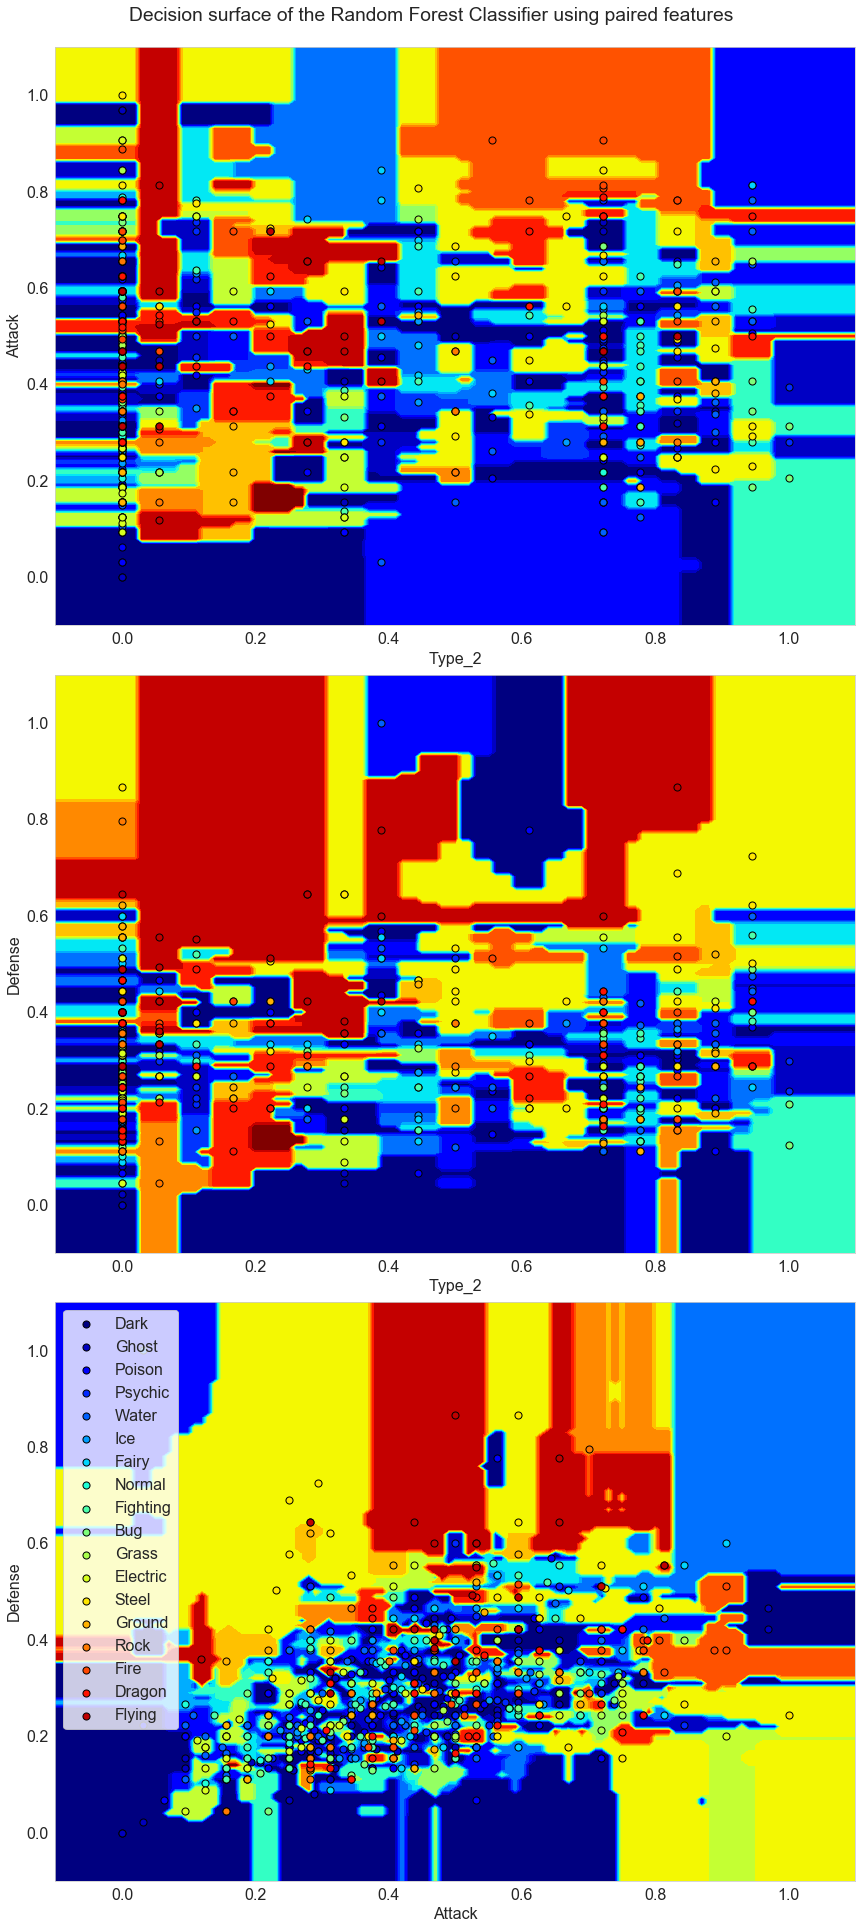

In [541]:
display_decision_boundaries(dataset_numeric_label, model, "Random Forest")

#### 2.5.2 K Nearest Neighbours Classification


Again, we use the K Nearest Neighbours algorithm. For this algorithm we will tune the number of neighbours parameter with 2, 3, 5 and 7 and number of features from 1 to 16 with step of 3 by 3.

In [542]:
#Dividing the datasets

X = scaled_dataset.iloc[:,:-1]
Y = scaled_dataset.iloc[:,-1]

In [550]:
# kNN classification:
  
allscores = []

#Number of neighbors
for i in [2,3,5,7]:
    scores = []

    #Number of features selected:
    for n in range(1,17,3):

        print('K-NN algorithm with ' + str(n) + ' features and ' + str(i) + ' neighbors:')

        # Slecting k most important variables and training:
        X_selection = SelectKBest(f_classif, k=n).fit_transform(X, Y)
        model = KNeighborsClassifier(n_neighbors=i)   
        scoring = {'accuracy': 'accuracy','precision_weighted': 'precision_weighted','recall_weighted': 'recall_weighted', 'f1_weighted' : 'f1_weighted'}

        cv=StratifiedKFold(n_splits=10)
        validation_scores = cross_validate(model, X_selection, Y,  scoring=scoring, cv=cv, return_train_score=False)

        print("f1: %0.2f (+/- %0.2f)" % (validation_scores['test_f1_weighted'].mean(), validation_scores['test_f1_weighted'].std() * 2))

        scores.append([n,[validation_scores['test_precision_weighted'].mean(),validation_scores['test_recall_weighted'].mean(),validation_scores['test_f1_weighted'].mean(), validation_scores['test_f1_weighted'].std() * 2]])
    allscores.append([i,scores])
        


K-NN algorithm with 1 features and 2 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fer

f1: 0.10 (+/- 0.12)
K-NN algorithm with 4 features and 2 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classificatio

f1: 0.23 (+/- 0.07)
K-NN algorithm with 7 features and 2 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.23 (+/- 0.09)
K-NN algorithm with 10 features and 2 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.27 (+/- 0.10)
K-NN algorithm with 13 features and 2 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: Un

f1: 0.24 (+/- 0.08)
K-NN algorithm with 16 features and 2 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.19 (+/- 0.09)
K-NN algorithm with 1 features and 3 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.14 (+/- 0.10)
K-NN algorithm with 4 features and 3 neighbors:
f1: 0.24 (+/- 0.12)
K-NN algorithm with 7 features and 3 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.27 (+/- 0.12)
K-NN algorithm with 10 features and 3 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.26 (+/- 0.10)
K-NN algorithm with 13 features and 3 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.25 (+/- 0.07)
K-NN algorithm with 16 features and 3 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.19 (+/- 0.06)
K-NN algorithm with 1 features and 5 neighbors:
f1: 0.15 (+/- 0.10)
K-NN algorithm with 4 features and 5 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.27 (+/- 0.09)
K-NN algorithm with 7 features and 5 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.30 (+/- 0.12)
K-NN algorithm with 10 features and 5 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fer

f1: 0.24 (+/- 0.12)
K-NN algorithm with 13 features and 5 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.23 (+/- 0.08)
K-NN algorithm with 16 features and 5 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.19 (+/- 0.12)
K-NN algorithm with 1 features and 7 neighbors:
f1: 0.16 (+/- 0.09)
K-NN algorithm with 4 features and 7 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.26 (+/- 0.11)
K-NN algorithm with 7 features and 7 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Un

f1: 0.29 (+/- 0.11)
K-NN algorithm with 10 features and 7 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.25 (+/- 0.12)
K-NN algorithm with 13 features and 7 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metri

f1: 0.25 (+/- 0.09)
K-NN algorithm with 16 features and 7 neighbors:


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fer

f1: 0.21 (+/- 0.10)


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The warning displayed is due to we do not get any element classified as a certain class. This was expected for the minority classes.

Due to the training process is long, we will save the resulting scores in a file so we do not need to run this code again unless we want to use new parametes.

In [551]:
# Saving the scores:

filename = 'scores/knn_scores_real.sav'
pickle.dump(allscores, open(filename, 'wb'))

In [552]:
# Loading scores

filename = 'scores/knn_scores_real.sav'
with open(filename, 'rb') as f:
    allscores = pickle.load(f)

Next we will find the best model from the set of the trained models based on the f1-score:

In [553]:
bestf1score = [0,0]

for i in range(len(allscores)):
    for n in range(len(allscores[i][1])):
        #We check that the new f1 score minus it standard deviation is better than the actual best score minus 
        #it standard deviation
        if  bestf1score[0] - bestf1score[1]/2 < allscores[i][1][n][1][2] - allscores[i][1][n][1][3]/2:
            bestf1score = allscores[i][1][n][1][2:4]         
            features = allscores[i][1][n][0]
            n_neighbors = allscores[i][0]

print("f1-score: " + str(bestf1score[0]) + " (+/-) " + str(bestf1score[1]))
print("Number of features: " + str(features))
print("Number of neighbors: " + str(n_neighbors))

feature_names = list(X.columns.values)
mask = SelectKBest(score_func=f_classif, k=features).fit(X, Y).get_support() #list of boolean
new_features = [] # The list of K best features
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

print("Features used: " + str(new_features))

f1-score: 0.2991850453716588 (+/-) 0.11719750758893539
Number of features: 7
Number of neighbors: 5
Features used: ['Attack', 'Defense', 'Sp_Atk', 'Color', 'hasGender', 'Pr_Male', 'Weight_kg']


Once we have found the best configuration for the K Nearest Neighbours algorithm, we are going to obtain the classification report, the confusion matrix and the decision boundaries for the best model configuration. It is important to remark that the decision boundaries are fitted with the whole dataset.

In [554]:
#We obtain the prediction for each input using the corss_val_predict:

X_selection = SelectKBest(f_classif, k=7).fit_transform(X, Y)

model = KNeighborsClassifier(n_neighbors=5)

knn_prediction = cross_val_predict(estimator=model, X=X_selection, y=Y, cv=StratifiedKFold(n_splits=10))

print(classification_report(Y, knn_prediction))

              precision    recall  f1-score   support

         Bug       0.21      0.37      0.27        63
        Dark       0.08      0.11      0.09        28
      Dragon       0.04      0.04      0.04        24
    Electric       0.20      0.22      0.21        36
       Fairy       0.26      0.29      0.28        17
    Fighting       0.47      0.36      0.41        25
        Fire       0.68      0.49      0.57        47
      Flying       0.00      0.00      0.00         3
       Ghost       0.08      0.04      0.06        23
       Grass       0.43      0.50      0.46        66
      Ground       0.05      0.03      0.04        30
         Ice       0.00      0.00      0.00        23
      Normal       0.43      0.43      0.43        93
      Poison       0.37      0.36      0.36        28
     Psychic       0.29      0.21      0.24        47
        Rock       0.35      0.15      0.21        41
       Steel       0.40      0.36      0.38        22
       Water       0.37    

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Despite the result obtained by this classifier is acceptable (weighted F1 score of 0.31), it is worse than the result for the Random Forest Classifier.

Next we will display the confussion matrix:

In [555]:
print(confusion_matrix(y_true = Y, y_pred = knn_prediction, sample_weight=None))

[[23  2  1  4  1  0  1  0  1  2  3  0  6  6  6  1  1  5]
 [ 7  3  4  1  0  1  0  0  0  1  2  0  0  2  0  0  0  7]
 [ 5  5  1  2  0  0  0  0  1  1  0  0  5  0  1  0  1  2]
 [ 4  4  3  8  0  0  2  0  0  3  0  0  3  0  0  0  0  9]
 [ 2  0  1  1  5  0  0  0  0  2  0  1  2  0  2  0  0  1]
 [ 1  1  0  0  0  9  1  0  0  3  0  0  5  0  0  2  0  3]
 [ 7  3  2  1  0  0 23  0  2  2  0  0  1  0  2  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  1]
 [ 4  1  2  0  0  0  0  0  1  1  1  0  3  0  5  0  1  4]
 [ 4  2  0  3  1  0  3  0  2 33  0  0  5  1  3  1  1  7]
 [ 8  1  2  1  0  1  0  0  0  0  1  0  7  0  0  4  3  2]
 [ 2  0  1  1  2  0  1  0  0  1  0  0  3  0  0  1  0 11]
 [10  7  3  4  4  2  2  0  0  2  3  0 40  4  2  1  0  9]
 [ 7  1  0  1  0  0  0  0  0  4  0  0  3 10  0  0  0  2]
 [ 9  1  0  4  4  0  0  0  3  4  0  0  1  2 10  0  0  9]
 [ 2  1  0  1  0  5  1  0  0  5  4  0  4  0  1  6  4  7]
 [ 2  0  2  1  0  0  0  0  1  2  3  1  0  0  0  1  8  1]
 [12  5  4  8  2  1  0  0  1  8

As we can see in the confussion matrix, there exists 2 cells in the main diagonal with 0. This is because we are not predicting any sample as Flying or Ice type. 

Finally, we will display the decission boundaries for the best K Nearest Neighbours model:

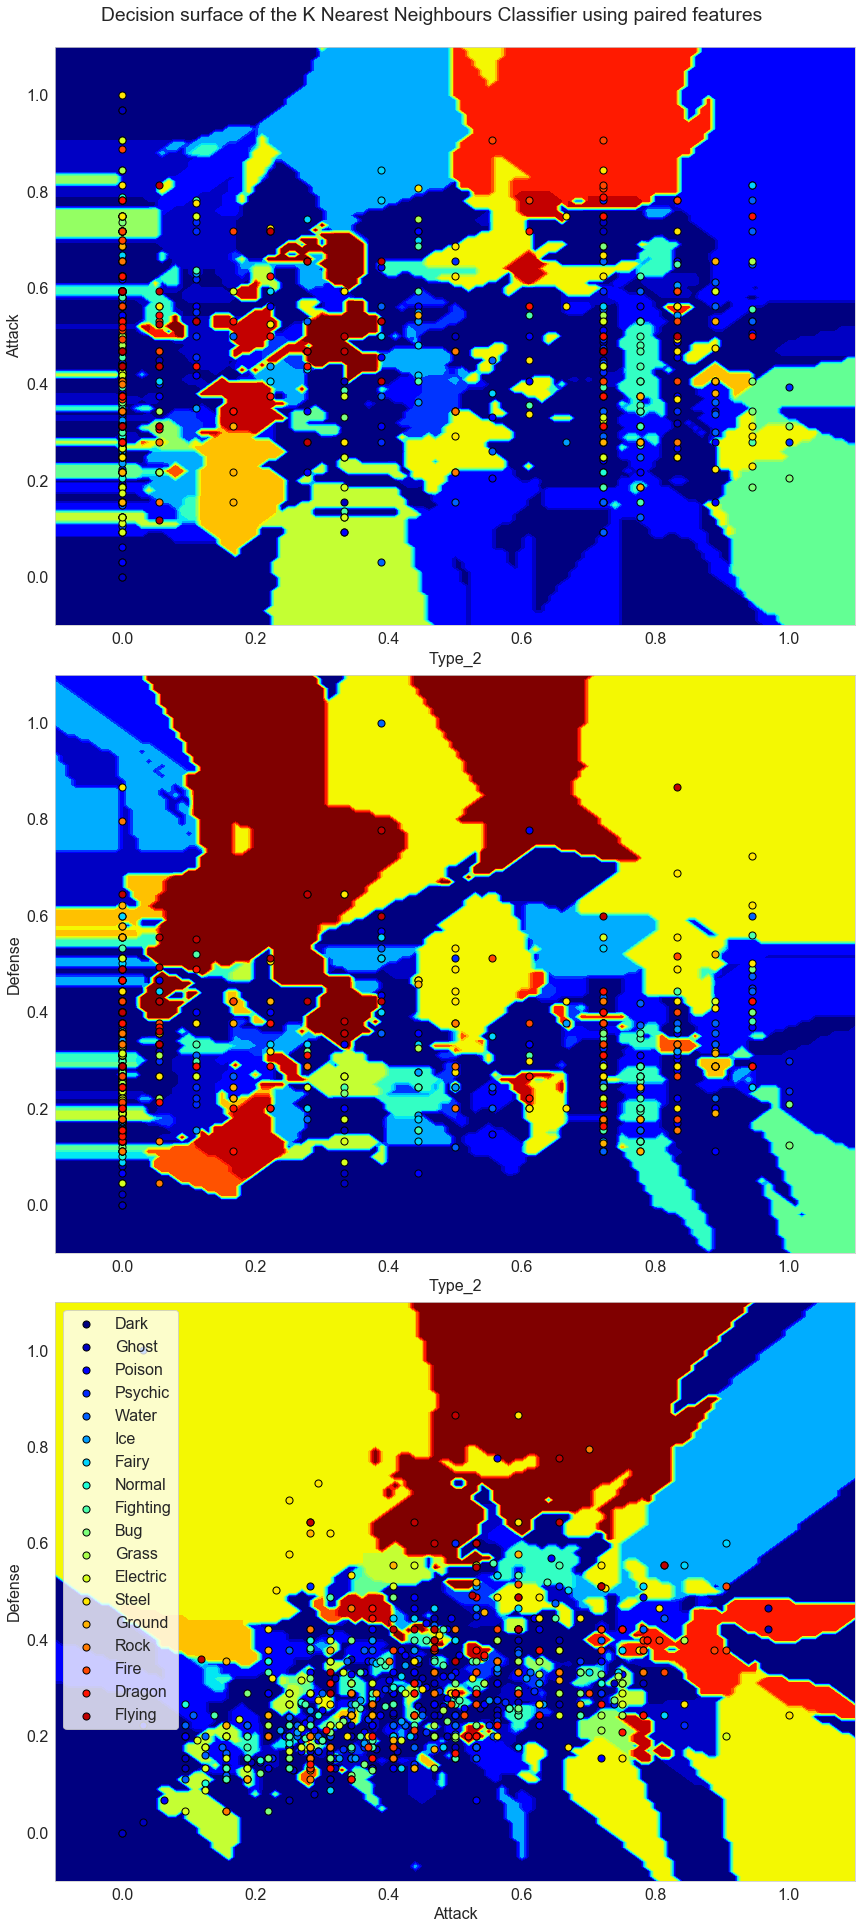

In [556]:
display_decision_boundaries(dataset_numeric_label, model, "K Nearest Neighbours")

We can conclude that for this dataset the best algorithm is the Random Forest Classifier using a total of 10 Features and 900 estimators (trees). This model seems to do good job with imbalanced datasets, were the number of samples of certain classes is low and the number of total classes is eleveted.

The features used were:
    - Type_2, Attack, Defense, Sp_Atk, Speed, Color, hasGender, Pr_Male, Weight_kg and Body_Style.


This model obtained a weighted F1 score of 0.38 which is pretty good for a classification problem of 18 features. Comparing the accuracy of this model: 40% with the expected accuracy of a random classifier in a 18-nary classification: 5.56% we can affirm that the result obtained is pretty good. Enven more after checking the high mixture and class overlapping of the dataset.

